# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

from scipy import stats
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

import pickle

Insight : Melakukan `import libraries` untuk keperluan `analisis` dan `pemodelan` dataset.

# **Data Loading**

## Problem Statement with SMART Framework 

`Spesific:` To predict whether students will dropout or not.<br>

`Measurable:` Achieve an accuracy and cross-validation score in the prediction model of approximately 75%.<br>

`Achievable:` Attain a good predictive model through hyperparameter tuning.<br>

`Relevant:` Reduce dropout rates and enhance student success.<br>

`Time-bound:` Develop and continuously evaluate the model until the end of the second semester.<br>

## Load Data

In [2]:
df = pd.read_csv('data.csv', sep=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


`Dataset Link :` https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

Insight : Membuat `dataframe` pada data `csv` menggunakan `pd.read_csv`. Dan di atas terdapat `link dataset` yang digunakan.

## Duplicates Handling

In [3]:
duplicates_count = df.duplicated().sum()
duplicates_count

0

Insight : Mengecek `jumlah duplikasi` data menggunakan `duplicated` dan `sum`. Terlihat bahwa pada hasil, `data` `tidak` ada yang mengalami `duplikat`. Jadi, tidak perlu menangani duplikasi data.

# **Exploratory Data Analysis (EDA)**

In [4]:
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


Insight : Melihat `10 data teratas` menggunakan fungsi `head(10)`

In [5]:
df.tail(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4414,1,1,1,9130,1,1,137.0,1,3,38,...,0,5,8,5,11.600000,0,9.4,-0.8,-3.12,Graduate
4415,4,39,1,9500,1,19,133.1,1,37,37,...,0,7,12,3,11.083333,0,11.1,0.6,2.02,Dropout
4416,1,43,2,9500,1,1,136.0,1,38,38,...,11,14,15,12,12.625000,1,7.6,2.6,0.32,Graduate
4417,1,1,1,9070,1,1,132.0,1,1,1,...,0,6,6,6,13.500000,0,16.2,0.3,-0.92,Graduate
4418,1,44,1,9070,1,39,120.0,1,3,38,...,5,9,10,7,13.142857,1,16.2,0.3,-0.92,Graduate
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


Insight : Melihat `10 data terbawah` menggunakan fungsi `tail(10)`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Insight : Menggunakan fungsi `info` untuk melihat `detail informasi` pada `struktur dataset`. Pada tipe data, terlihat tidak ada yang object kecuali kolom `Target`. Akan tetapi, diasumsikan bahwa seluruh fitur `kategorikal` sudah dilakukan `encoding` dan `diubah` tipe datanya menjadi `integer` bukan string atau object oleh `pembuat dataset`. Kemudian `seluruh kolom` tidak memiliki missing value alias `non-null`. Setelah ini akan dilakukan `pengecekan` `missing value` pada `dataset original`.

In [7]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Insight : Melihat jumlah nilai `null` atau `NaN` pada seluruh kolom menggunakan `isna` dan `sum`. Terlihat bahwa `tidak ada` kolom yang memiliki nilai `null` atau `NaN`. 

In [8]:
num_df = df[['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']]
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Admission grade,4424.0,126.978119,14.482001,95.00,117.90,126.100000,134.800000,190.000000
Age at enrollment,4424.0,23.265145,7.587816,17.00,19.00,20.000000,25.000000,70.000000
Curricular units 1st sem (credited),4424.0,0.709991,2.360507,0.00,0.00,0.000000,0.000000,20.000000
Curricular units 1st sem (enrolled),4424.0,6.270570,2.480178,0.00,5.00,6.000000,7.000000,26.000000
Curricular units 1st sem (evaluations),4424.0,8.299051,4.179106,0.00,6.00,8.000000,10.000000,45.000000
Curricular units 1st sem (approved),4424.0,4.706600,3.094238,0.00,3.00,5.000000,6.000000,26.000000
Curricular units 1st sem (grade),4424.0,10.640822,4.843663,0.00,11.00,12.285714,13.400000,18.875000
Curricular units 1st sem (without evaluations),4424.0,0.137658,0.690880,0.00,0.00,0.000000,0.000000,12.000000
Curricular units 2nd sem (credited),4424.0,0.541817,1.918546,0.00,0.00,0.000000,0.000000,19.000000


Insight : Mengecek perhitungan `statistik` pada seluruh kolom `numerik` menggunakan fungsi `describe`. Dan fungsi `T` itu untuk `mengubah dimensi` yaitu baris jadi kolom dan kolom jadi baris. Insight : Terlihat ada `beberapa` kolom numerik yang memiliki nilai `median (50%)` yang jauh terhadap `mean`. Setelah ini akan dicek `skewness` dan `outlier`-nya.

In [9]:
num_df.skew()

Previous qualification (grade)                    0.312867
Admission grade                                   0.530600
Age at enrollment                                 2.054988
Curricular units 1st sem (credited)               4.169049
Curricular units 1st sem (enrolled)               1.619041
Curricular units 1st sem (evaluations)            0.976637
Curricular units 1st sem (approved)               0.766262
Curricular units 1st sem (grade)                 -1.568146
Curricular units 1st sem (without evaluations)    8.207403
Curricular units 2nd sem (credited)               4.634820
Curricular units 2nd sem (enrolled)               0.788114
Curricular units 2nd sem (evaluations)            0.336497
Curricular units 2nd sem (approved)               0.306279
Curricular units 2nd sem (grade)                 -1.313650
Curricular units 2nd sem (without evaluations)    7.267701
Unemployment rate                                 0.212051
Inflation rate                                    0.2523

Insight : Mengecek `skewness` pada kolom `numerik` menggunakan fungsi `skew`. Terlihat bahwa yang diasumsikan `median` jauh terhadap `mean` ternyata memiliki skewness `negatif`. Dan di sini terlihat juga bahwa terdapat beberapa kolom `numerik` yang memiliki distribusi yang cukup `ekstrem` atau skewness lebih dari 1. `Subjektif` saya, pada kolom numerik yang ekstrem tersebut, memang `sejatinya` mempunyai nilai yang `bervariasi` secara `alami`.

In [10]:
q1 = num_df.quantile(0.25)
q3 = num_df.quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

outlier = ((num_df < low_bound) | (num_df > up_bound)).sum()
outlier

Previous qualification (grade)                    179
Admission grade                                    86
Age at enrollment                                 441
Curricular units 1st sem (credited)               577
Curricular units 1st sem (enrolled)               424
Curricular units 1st sem (evaluations)            158
Curricular units 1st sem (approved)               180
Curricular units 1st sem (grade)                  726
Curricular units 1st sem (without evaluations)    294
Curricular units 2nd sem (credited)               530
Curricular units 2nd sem (enrolled)               369
Curricular units 2nd sem (evaluations)            109
Curricular units 2nd sem (approved)                44
Curricular units 2nd sem (grade)                  877
Curricular units 2nd sem (without evaluations)    282
Unemployment rate                                   0
Inflation rate                                      0
GDP                                                 0
dtype: int64

Insight : Mengecek `outlier` pada kolom `numerik` menggunakan moetode `interquartil` dan `low up bound`. Terlihat bahwa seluruhnya memiliki `outlier` kecuali pada `'Unemployment rate'`, `'Inflation rate'`, dan `'GDP'`.

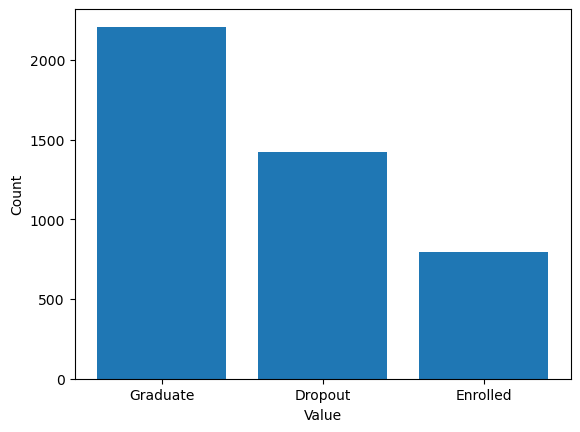

In [11]:
counts = df['Target'].value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

Insight : Melihat grafik pada kolom `'Target'` untuk nantinya akan dijadikan `target` pada `pemodelan`. Maka dapat dikatakan bahwa pada `dataset`, students yang mengalami `Graduate` lebih `banyak` dan yang `Enrolled` lebih `sedikit`. `Grafik` menggunakan `matloplib` pada kolom yang difungsikan oleh `value_counts` untuk menghitung `total` `value`-nya.

In [12]:
print(df[df['Target'] == 'Graduate'].shape[0])
print(df[df['Target'] == 'Dropout'].shape[0])
print(df[df['Target'] == 'Enrolled'].shape[0])

2209
1421
794


Insight : Melihat jumlah baris masing-masing value pada kolom 'Target' menggunakan teknik `shape`. Pada hasil, `Graduate` memiliki jumlah sebanyak `2209`, `Dropout` sebanyak `1421`, dan `Enrolled` sebanyak `794`.

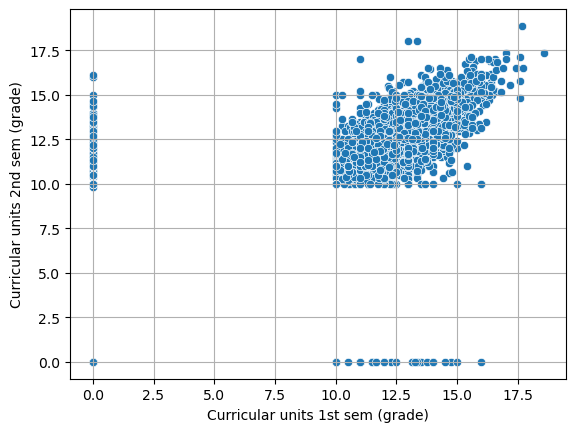

In [13]:
sns.scatterplot(data=df, x='Curricular units 2nd sem (grade)', y='Curricular units 1st sem (grade)')

plt.xlabel('Curricular units 1st sem (grade)')
plt.ylabel('Curricular units 2nd sem (grade)')
plt.grid(True)
plt.show()

Insight : Melihat `korelasi` antar `2 variabel` menggunakan `scatterplot` dari `seaborn` yang grafiknya dibuat oleh `matplotlib`. Saya mengambil 2 variabel di atas, karena jika dilihat dari `deskripsi` kolom-kolom pada dataset, 2 variabel ini cukup `berpengaruh` terhadap kolom 'Target' yang merupakan target pada pemodelan. Pada hasil, `korelasi` antara kedua variabel cukup `signifikan`.

Anova testing results on Previous qualification (grade) feature with the target:
   Source  ddof1  ddof2          F         p-unc       np2
0  Target      2   4421  27.728589  1.077783e-12  0.012389




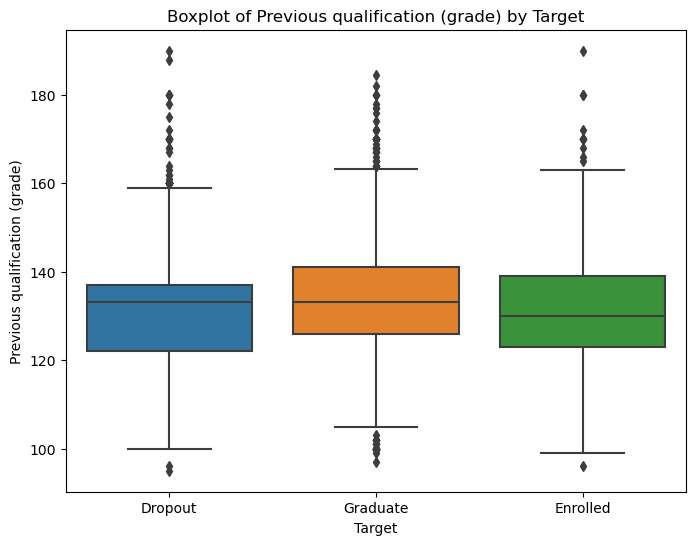

Anova testing results on Admission grade feature with the target:
   Source  ddof1  ddof2          F         p-unc       np2
0  Target      2   4421  35.648604  4.380466e-16  0.015871




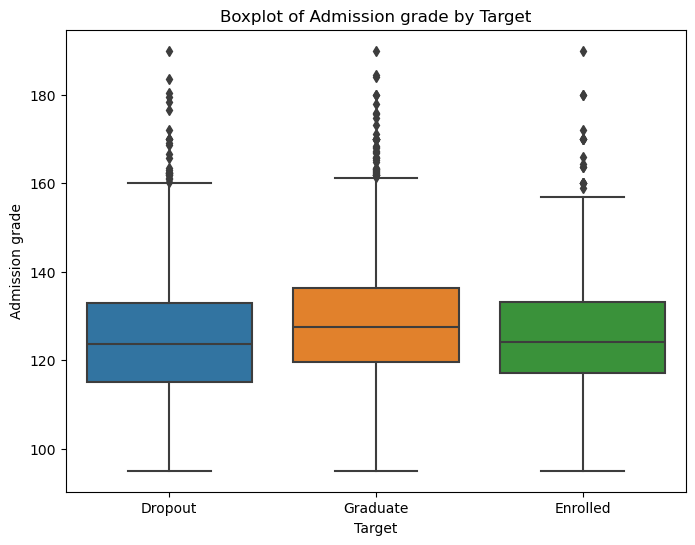

Anova testing results on Age at enrollment feature with the target:
   Source  ddof1  ddof2           F         p-unc       np2
0  Target      2   4421  154.712071  1.138849e-65  0.065412




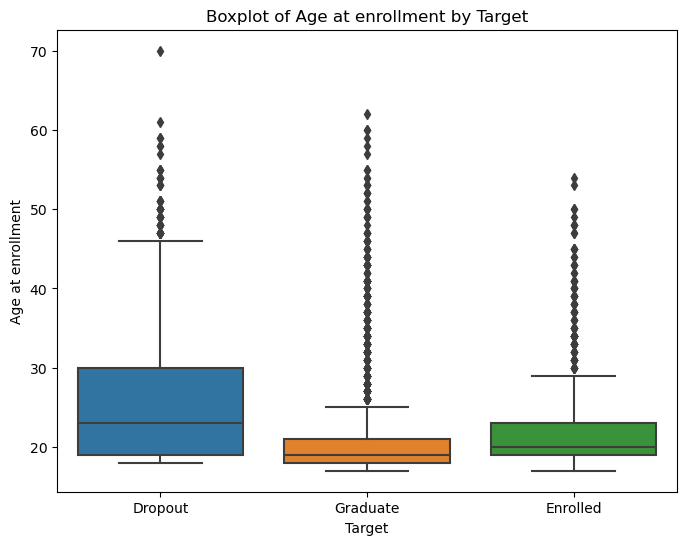

Anova testing results on Curricular units 1st sem (credited) feature with the target:
   Source  ddof1  ddof2         F     p-unc       np2
0  Target      2   4421  7.979355  0.000347  0.003597




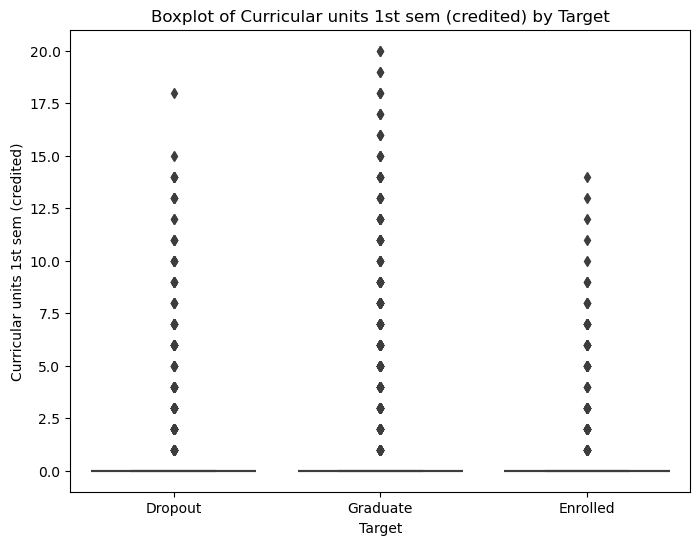

Anova testing results on Curricular units 1st sem (enrolled) feature with the target:
   Source  ddof1  ddof2          F         p-unc       np2
0  Target      2   4421  59.467391  3.272852e-26  0.026197




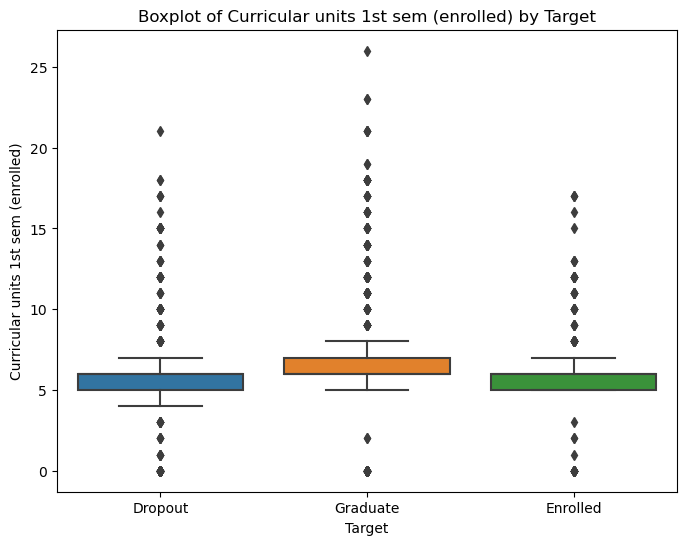

Anova testing results on Curricular units 1st sem (evaluations) feature with the target:
   Source  ddof1  ddof2         F         p-unc       np2
0  Target      2   4421  37.52784  6.897115e-17  0.016694




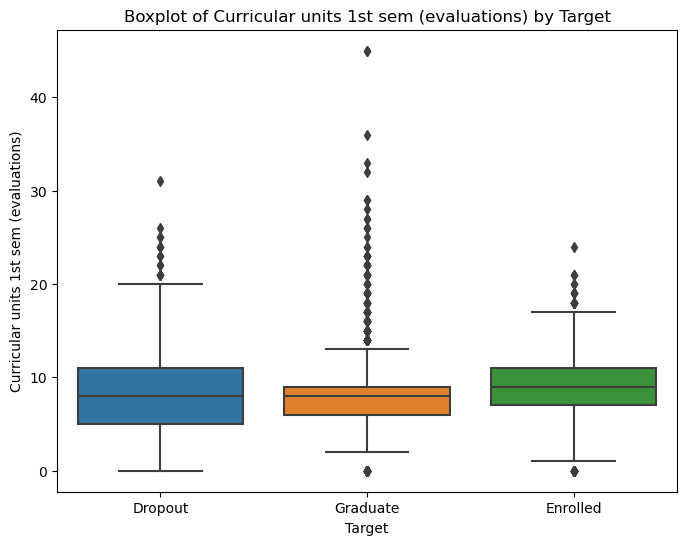

Anova testing results on Curricular units 1st sem (approved) feature with the target:
   Source  ddof1  ddof2           F          p-unc       np2
0  Target      2   4421  859.866768  3.649472e-316  0.280053




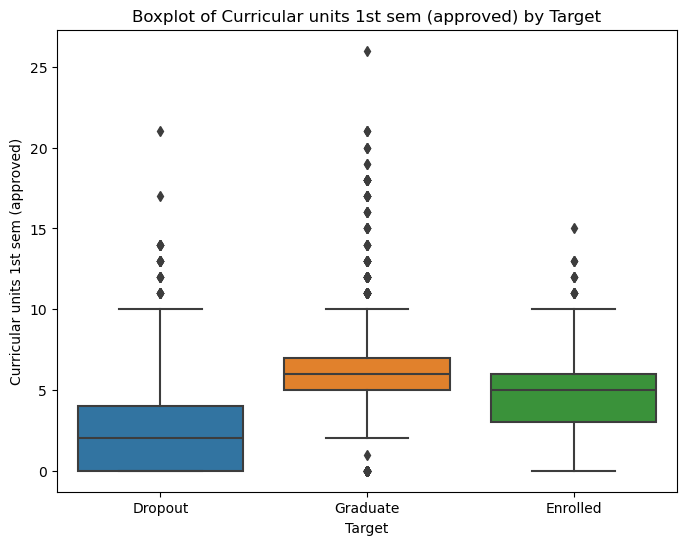

Anova testing results on Curricular units 1st sem (grade) feature with the target:
   Source  ddof1  ddof2           F          p-unc      np2
0  Target      2   4421  713.517328  2.803052e-269  0.24402




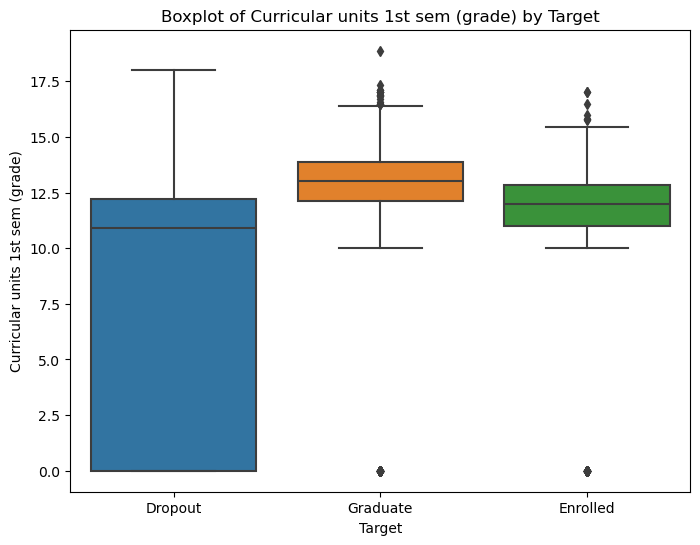

Anova testing results on Curricular units 1st sem (without evaluations) feature with the target:
   Source  ddof1  ddof2          F     p-unc       np2
0  Target      2   4421  11.437319  0.000011  0.005147




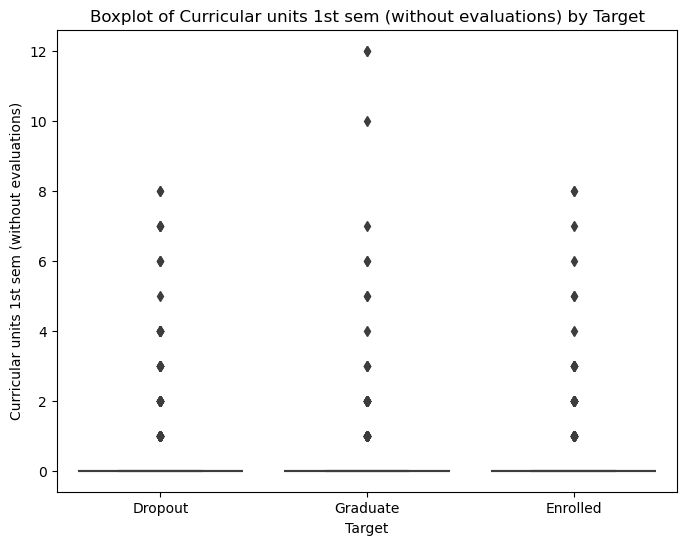

Anova testing results on Curricular units 2nd sem (credited) feature with the target:
   Source  ddof1  ddof2         F     p-unc       np2
0  Target      2   4421  9.974542  0.000048  0.004492




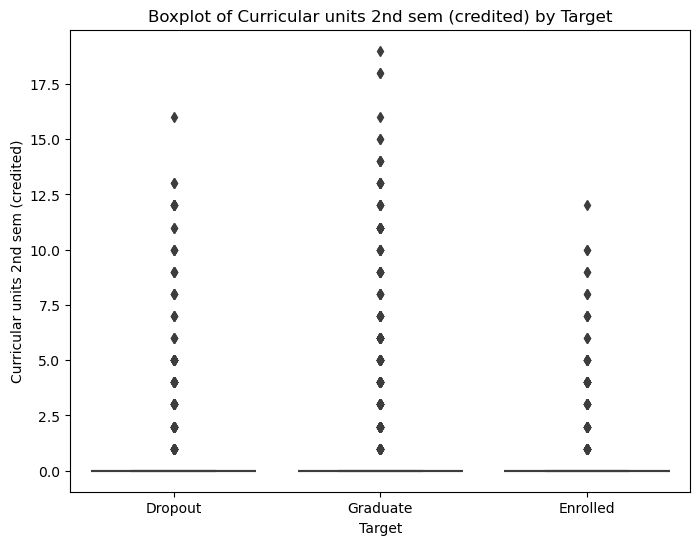

Anova testing results on Curricular units 2nd sem (enrolled) feature with the target:
   Source  ddof1  ddof2         F         p-unc       np2
0  Target      2   4421  75.59191  5.244430e-33  0.033066




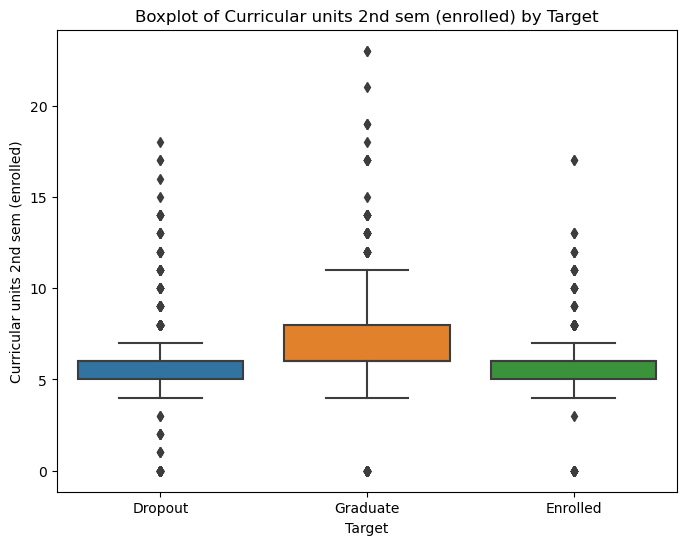

Anova testing results on Curricular units 2nd sem (evaluations) feature with the target:
   Source  ddof1  ddof2          F         p-unc       np2
0  Target      2   4421  87.801092  4.039137e-38  0.038203




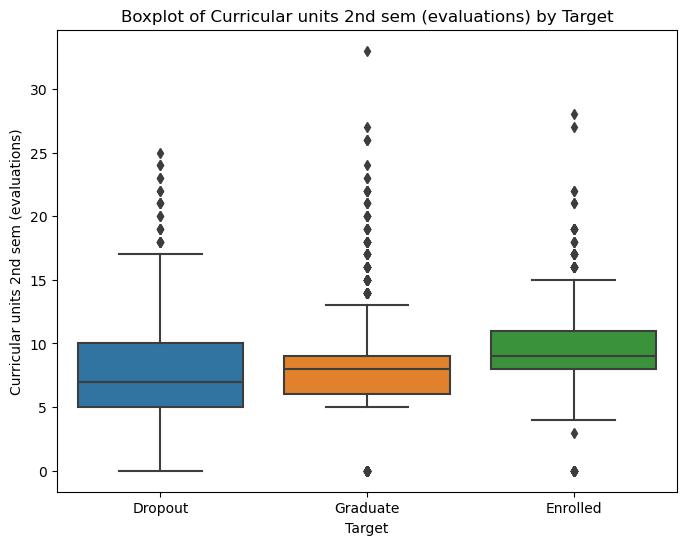

Anova testing results on Curricular units 2nd sem (approved) feature with the target:
   Source  ddof1  ddof2            F  p-unc       np2
0  Target      2   4421  1410.732938    0.0  0.389573




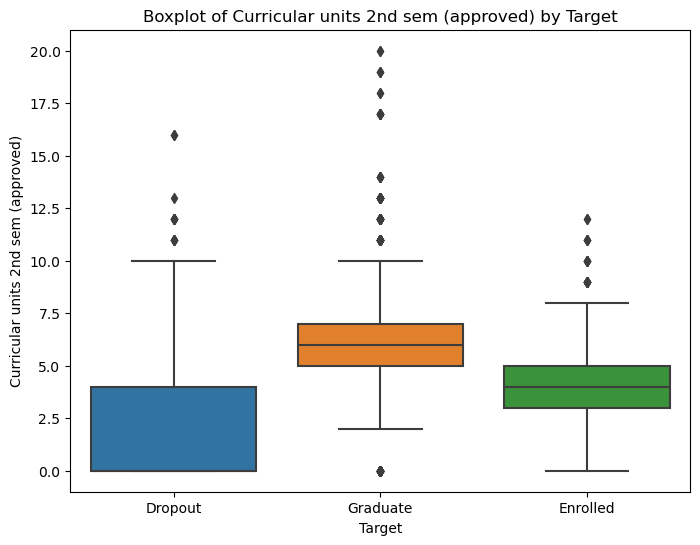

Anova testing results on Curricular units 2nd sem (grade) feature with the target:
   Source  ddof1  ddof2            F  p-unc       np2
0  Target      2   4421  1134.109544    0.0  0.339086




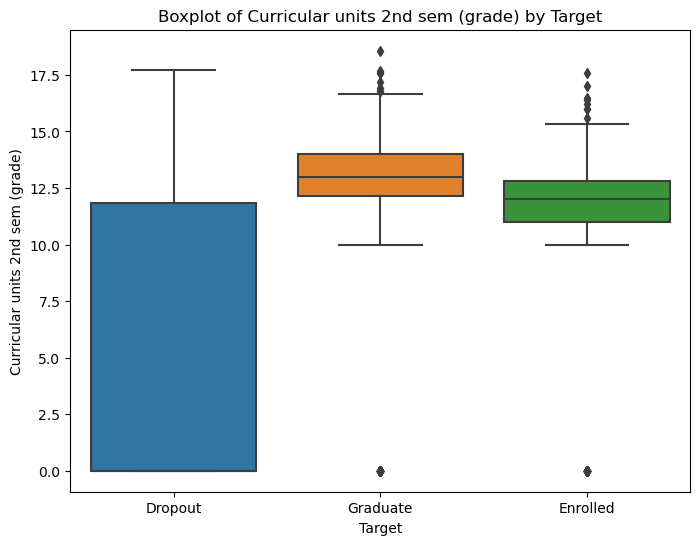

Anova testing results on Curricular units 2nd sem (without evaluations) feature with the target:
   Source  ddof1  ddof2          F         p-unc       np2
0  Target      2   4421  20.185531  1.876375e-09  0.009049




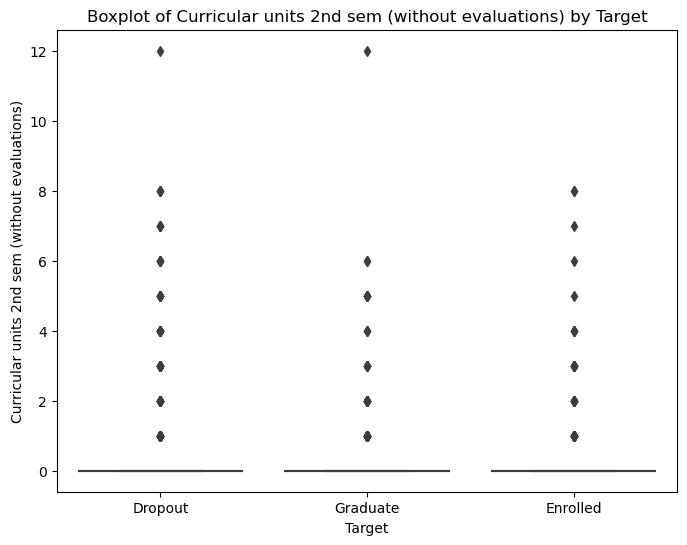

Anova testing results on Unemployment rate feature with the target:
   Source  ddof1  ddof2         F   p-unc       np2
0  Target      2   4421  5.922513  0.0027  0.002672




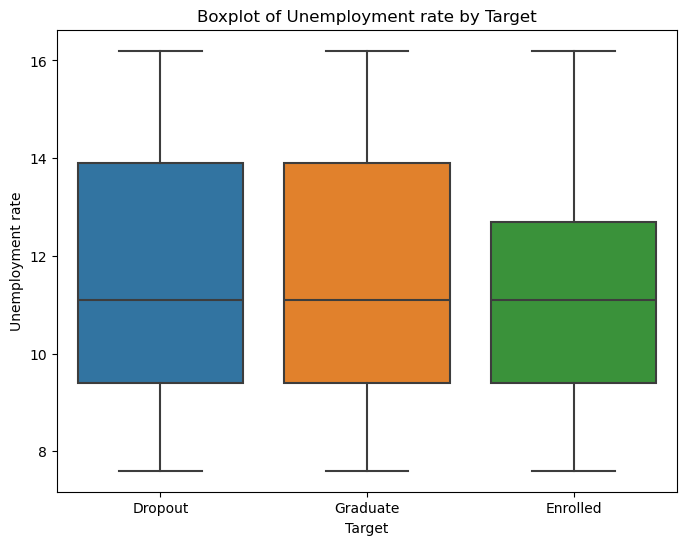

Anova testing results on Inflation rate feature with the target:
   Source  ddof1  ddof2        F     p-unc       np2
0  Target      2   4421  1.74199  0.175292  0.000787




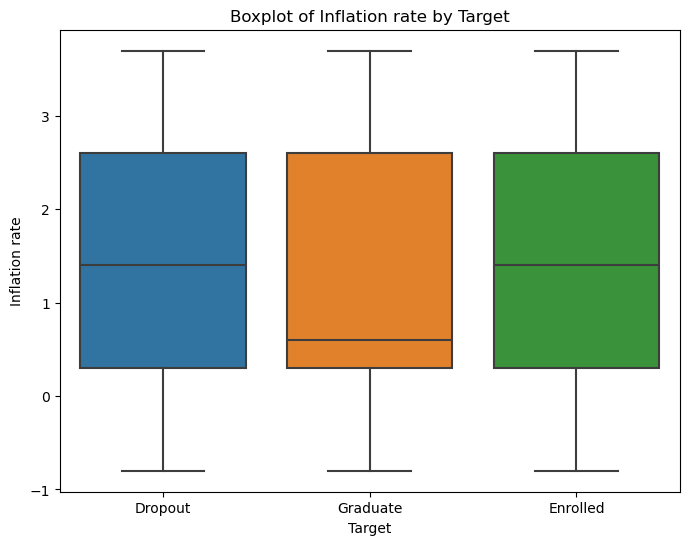

Anova testing results on GDP feature with the target:
   Source  ddof1  ddof2         F     p-unc       np2
0  Target      2   4421  4.799009  0.008281  0.002166




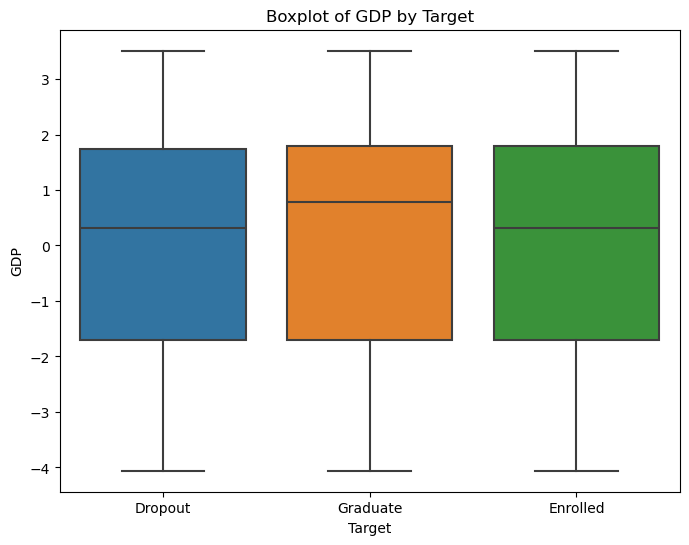

In [14]:
for column in num_df:
    print(f"Anova testing results on {column} feature with the target:")
    anova_result = pg.anova(data=df, dv=column, between='Target')
    print(anova_result)
    print("\n")

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Target', y=column)
    plt.title(f'Boxplot of {column} by Target')
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.show()

Insight : Pada `korelasi` antara kolom `numerikal` dan `'Target'` menggunakan `Anova Test`, dapat diasumsikan bahwa meskipun beberapa kolom `numerikal` `tidak` memiliki `outlier`, namun bukan berarti mereka `mempunyai` `korelasi` dengan `'Target'`, karena jika dilihat `P-value` pada keseluruhan, masih `banyak` kolom `numerikal` yang `memiliki` `outlier` punya `korelasi` dengan `'Target'` jika `critical value` `0.05`. Grafik `box plot` digunakan `matplotlib` untuk `kerangkanya` dan `desainnya` menggunakan `seaborn`.

c:\Users\DELL G3\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


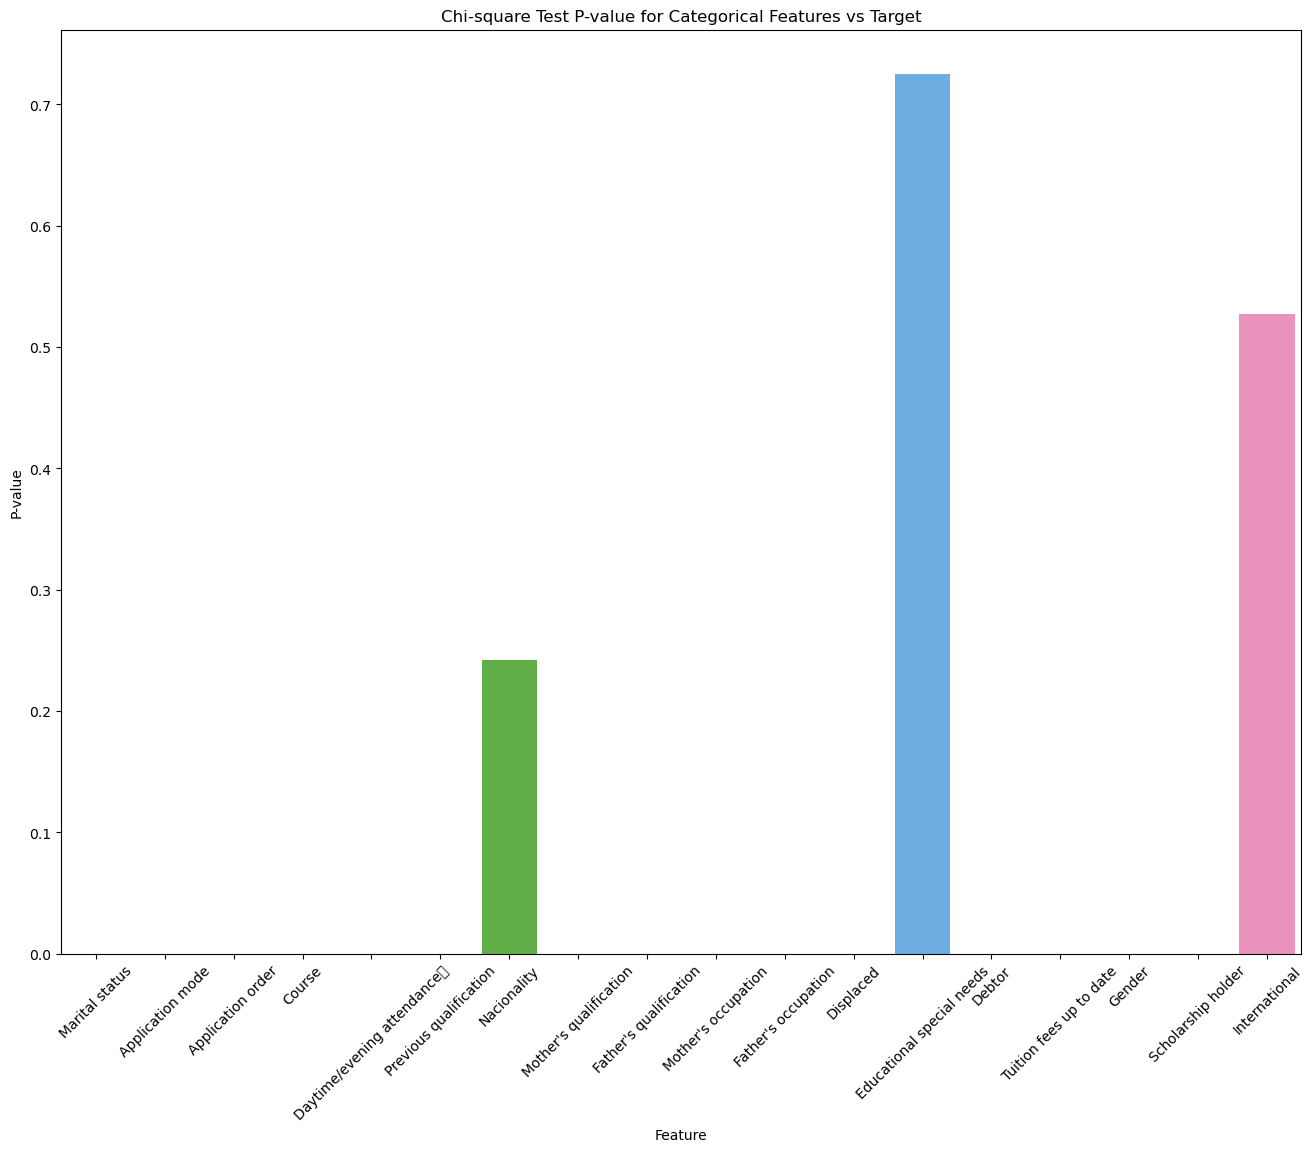

In [15]:
cat_df = df[['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']]
p_values = {}

for col in cat_df:
    contingency_table = pd.crosstab(df[col], df['Target'])
    res = stats.chi2_contingency(contingency_table)
    p_values[col] = res.pvalue

p_values_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p_value'])
p_values_df.index.name = 'Feature'

plt.figure(figsize=(16, 12))
sns.barplot(x=p_values_df.index, y='p_value', data=p_values_df)
plt.title('Chi-square Test P-value for Categorical Features vs Target')
plt.xlabel('Feature')
plt.ylabel('P-value')
plt.xticks(rotation=45)
plt.show()

Insight : Pada `korelasi` antara kolom `kategorikal` dan `'Target'` menggunakan `Chi-Square Test`, dapat diasumsikan bahwa terdapat `3` kolom yang `tidak` memiliki `korelasi` dengan `'Target'` yaitu pada `'Nacionality'`, `'Educational special needs'`, dan `'International'`, karena `P-value` berada di `atas` `critical value 0.05`. Grafik `bar plot` digunakan `matplotlib` untuk `kerangkanya` dan `desainnya` menggunakan `seaborn`. Pada bar plot juga terdapat `warning`, karena masalah `font` yang terdapat pada kolom `'Daytime/evening attendance\t'`. Namun saya `membiarkannya` dan akan melakukan `rename` kolom pada `Feature Engineering`.

# **Feature Engineering**

## Define X and y

In [16]:
X = df.drop('Target', axis=1)
y = df['Target']

Insight : Mendefinisikan X dan y dengan `X` `fitur` dan `y` `target`. X mengambil seluruh kolom kecuali target menggunakan fungsi `drop`. Dan y mengambil kolom 'Target' saja.

## Define the numerical and categorical

### 1. Columns Check

In [17]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

Insight : `Mengecek` terlebih dahulu nama dari `seluruh kolom` apakah masih ada yang typo atau kurang menggunakan fungsi `columns`. Di sini terlihat ada `1 kolom` yang justru kelebihan namanya yaitu pada `Daytime/evening attendance`, bahwasanya tidak diharuskan ada `'\t'` supaya ketika pemodelan lebih `mudah` untuk dicerna.

### 2. Rename 'Daytime/evening attendance\t' Feature

In [18]:
X.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'}, inplace=True)

Insight : Melakukan `rename` nama kolom menggunakan fungsi `rename` pada kolom `Daytime/evening attendance\t` menjadi `Daytime/evening attendance` agar lebih enak dilihat pada pemodelan.

### 3. Defining Numerical and Categorical Features

In [19]:
nums = X[['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']]
cats = X[['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']]

Insight : Setelah itu, melakukan `pendefinisian` fitur `numerik` dan juga fitur `kategorikal`.

## Numerical Feature Correlation with the Target

In [20]:
for column in nums:
    print(f"Anova testing results on {column} feature with the target:")
    anova_result = pg.anova(data=df, dv=column, between='Target')
    print(anova_result)
    print("\n")

Anova testing results on Previous qualification (grade) feature with the target:
   Source  ddof1  ddof2          F         p-unc       np2
0  Target      2   4421  27.728589  1.077783e-12  0.012389


Anova testing results on Admission grade feature with the target:
   Source  ddof1  ddof2          F         p-unc       np2
0  Target      2   4421  35.648604  4.380466e-16  0.015871


Anova testing results on Age at enrollment feature with the target:
   Source  ddof1  ddof2           F         p-unc       np2
0  Target      2   4421  154.712071  1.138849e-65  0.065412


Anova testing results on Curricular units 1st sem (credited) feature with the target:
   Source  ddof1  ddof2         F     p-unc       np2
0  Target      2   4421  7.979355  0.000347  0.003597


Anova testing results on Curricular units 1st sem (enrolled) feature with the target:
   Source  ddof1  ddof2          F         p-unc       np2
0  Target      2   4421  59.467391  3.272852e-26  0.026197


Anova testing results

Insight : Melakukan pengecekan `korelasi` antara fitur `numerikal` dengan `target` menggunakan `Anova` testing yang mana testing ini dapat menguji `korelasi` pada 2 atau lebih variabel antara `numerikal` dan `kategorikal`. Digunakan library `pingouin` dengan fungsi `anova` dan perulangan `for` untuk mengecek seluruh fitur `numerik` yang memiliki `korelasi` pada `target`. Hasilnya adalah `seluruhnya` memiliki `korelasi` yang baik (p-unc < 0.05 & np2 mendekati 1) `kecuali` pada fitur `Curricular units 1st sem (credited)`, `Curricular units 1st sem (without evaluations)`, `Curricular units 2nd sem (credited)`, `Curricular units 2nd sem (without evaluations)`, `Unemployment rate`, `Inflation rate`, dan `GDP`.

## Categorical Feature Correlation with the Target

In [21]:
p_value = {}

for col in cats:
    contingency_table = pd.crosstab(X[col], [y])
    res = stats.chi2_contingency(contingency_table)
    print(f"P-value result on {col} feature:",res.pvalue)

P-value result on Marital status feature: 8.054279703889306e-10
P-value result on Application mode feature: 1.9646567814647118e-77
P-value result on Application order feature: 2.272034830371239e-09
P-value result on Course feature: 2.3165709040666167e-97
P-value result on Daytime/evening attendance feature: 5.743834299642735e-07
P-value result on Previous qualification feature: 7.160305160682533e-30
P-value result on Nacionality feature: 0.24222552059446276
P-value result on Mother's qualification feature: 5.823844464375137e-21
P-value result on Father's qualification feature: 3.175006994347662e-19
P-value result on Mother's occupation feature: 1.63085860350197e-31
P-value result on Father's occupation feature: 4.51543856251902e-19
P-value result on Displaced feature: 2.8763109461402946e-13
P-value result on Educational special needs feature: 0.7254049737386095
P-value result on Debtor feature: 4.858552123231672e-57
P-value result on Tuition fees up to date feature: 1.4716282631420466e

Insight : Mengecek `korelasi` antara seluruh fitur `kategorikal` dengan `target` menggunakan uji `chi-square` dengan memfungsikan library `stats` pada `chi2_contingency`. Pada hasil, `P-value` yang berada di `atas` `0.05` hanya ada 3 yaitu fitur `Nacionality`, `Educational special needs`, dan `International`. Selebihnya dapat diartikan memiliki `korelasi`, karena `P-value` berada di `bawah` critical value yaitu `0.05`.

## Splitting

In [22]:
# Redefine X
X_new = X[['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']]

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (3096, 26)
Test size  :  (1328, 26)


Insight : Melakukan `splitting` pada `fitur` dan `target` untuk dibuatkan `train` dan `test` nya menggunakan `train_test_split`. Pada `train`, meiliki sebesar `70%` dari total data. Dan pada test hanya `30%` menggunakan fungsi `test_size`.

## Outlier Handling on X_train

### 1. Skewness Checking

In [23]:
num_select_train = X_train[['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']]
num_select_train.skew()

Previous qualification (grade)            0.274444
Admission grade                           0.546891
Age at enrollment                         2.038944
Curricular units 1st sem (enrolled)       1.547047
Curricular units 1st sem (evaluations)    1.121908
Curricular units 1st sem (approved)       0.709335
Curricular units 1st sem (grade)         -1.573230
Curricular units 2nd sem (enrolled)       0.652595
Curricular units 2nd sem (evaluations)    0.341678
Curricular units 2nd sem (approved)       0.230229
Curricular units 2nd sem (grade)         -1.324572
dtype: float64

Insight : Mengecek terlebih dahulu `skewness` dari seluruh fitur `numerik` yang terpilih pada `X_train` menggunakan fungsi `skew`. Hasilnya adalah bahwa terdapat distribusi data `ekstrem` pada beberapa kolom yang memiliki nilai di `atas` `1` yang mana seluruhnya memiliki skewness `positif` `kecuali` pada `Curricular units (grade) pada 2 semester`.

### 2. Outliers Checking with Tukey's Rule

In [24]:
q1 = num_select_train.quantile(0.25)
q3 = num_select_train.quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

outliers_train = ((num_select_train < low_bound) | (num_select_train > up_bound)).sum()
outliers_train

Previous qualification (grade)             53
Admission grade                            87
Age at enrollment                         305
Curricular units 1st sem (enrolled)       297
Curricular units 1st sem (evaluations)    115
Curricular units 1st sem (approved)       126
Curricular units 1st sem (grade)          503
Curricular units 2nd sem (enrolled)       261
Curricular units 2nd sem (evaluations)     75
Curricular units 2nd sem (approved)        29
Curricular units 2nd sem (grade)          608
dtype: int64

Insight : Mengecek `outlier` pada `X_train` menggunakan `Tukey's Rule` yaitu dengan teknik perhitungan `interquartil` beserta `low` and `up` bound. `Outlier` paling `banyak` yaitu pada data dengan skewness `negatif` tadi yaitu `Curricular units (grade) pada 2 semester`. Dan di sini punya outlier semua, jadi data `outlier` akan `ditangani` lebih lanjut.

### 3. Outliers Handling

In [25]:
num_select_train = X_train[['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']].copy()

for col in num_select_train:
    num_select_train.loc[:, col] = winsorize(num_select_train[col], limits=[0.05, 0.05])

Insight : `Menangani` outlier menggunakan teknik `winsorize` yang mana teknik ini dapat membatasi data sesuai `kebutuhan` pada data. Di sini saya set batas `atas` dan `bawahnya` sebesar `5%` agar `outlier` dapat `ditangani` dengan baik.

### 4. Checking the Outliers Again

In [26]:
q1 = num_select_train.quantile(0.25)
q3 = num_select_train.quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

outliers_train = ((num_select_train < low_bound) | (num_select_train > up_bound)).sum()
outliers_train

Previous qualification (grade)              0
Admission grade                             0
Age at enrollment                         305
Curricular units 1st sem (enrolled)       162
Curricular units 1st sem (evaluations)      0
Curricular units 1st sem (approved)         0
Curricular units 1st sem (grade)          500
Curricular units 2nd sem (enrolled)         0
Curricular units 2nd sem (evaluations)      0
Curricular units 2nd sem (approved)         0
Curricular units 2nd sem (grade)          604
dtype: int64

Insight : Melakukan pengecekan kembali pada `outlier` fitur `numerikal` yang berada pada `X_train`. Pada hasil, sudah `tidak ada` lagi `outlier` pada beberapa fitur `kecuali` yang memiliki `distribusi` yang `ekstrem`. Pada fitur yang masih terdapat `outlier` dianggap sebagai outlier `alami` yang `bervariasi`. 

## Outlier Handling on X_test

### 1. Skewness Checking

In [27]:
num_select_test = X_test[['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']]
num_select_test.skew()

Previous qualification (grade)            0.407065
Admission grade                           0.493292
Age at enrollment                         2.088079
Curricular units 1st sem (enrolled)       1.775772
Curricular units 1st sem (evaluations)    0.600167
Curricular units 1st sem (approved)       0.890279
Curricular units 1st sem (grade)         -1.558183
Curricular units 2nd sem (enrolled)       1.094653
Curricular units 2nd sem (evaluations)    0.326417
Curricular units 2nd sem (approved)       0.472179
Curricular units 2nd sem (grade)         -1.290054
dtype: float64

Insight : Mengecek terlebih dahulu `skewness` dari seluruh fitur `numerik` yang terpilih pada `X_test` menggunakan fungsi `skew`. Hasilnya adalah bahwa terdapat distribusi data `ekstrem` pada beberapa kolom yang memiliki nilai di `atas` `1` yang mana seluruhnya memiliki skewness `positif` `kecuali` pada `Curricular units (grade) pada 2 semester`.

### 2. Outliers Checking with Tukey's Rule

In [28]:
q1 = num_select_test.quantile(0.25)
q3 = num_select_test.quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

outliers_test = ((num_select_test < low_bound) | (num_select_test > up_bound)).sum()
outliers_test

Previous qualification (grade)             51
Admission grade                            20
Age at enrollment                         136
Curricular units 1st sem (enrolled)       127
Curricular units 1st sem (evaluations)     43
Curricular units 1st sem (approved)        54
Curricular units 1st sem (grade)          225
Curricular units 2nd sem (enrolled)       108
Curricular units 2nd sem (evaluations)     34
Curricular units 2nd sem (approved)        15
Curricular units 2nd sem (grade)          269
dtype: int64

Insight : Mengecek `outlier` pada `X_test` menggunakan `Tukey's Rule` yaitu dengan teknik perhitungan `interquartil` beserta `low` and `up` bound. `Outlier` paling `banyak` yaitu pada data dengan skewness `negatif` tadi yaitu `Curricular units (grade) pada 2 semester`. Dan di sini punya outlier semua, jadi data `outlier` akan `ditangani` lebih lanjut.

### 3. Outliers Handling

In [29]:
num_select_test = X_test[['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']].copy()

for col in num_select_test:
    num_select_test.loc[:, col] = winsorize(num_select_test[col], limits=[0.05, 0.05])

Insight : `Menangani` outlier menggunakan teknik `winsorize` yang mana teknik ini dapat membatasi data sesuai `kebutuhan` pada data. Di sini saya set batas `atas` dan `bawahnya` sebesar `5%` agar `outlier` dapat `ditangani` dengan baik.

### 4. Checking the Outliers Again

In [30]:
q1 = num_select_test.quantile(0.25)
q3 = num_select_test.quantile(0.75)
iqr = q3 - q1

up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

outliers_test = ((num_select_test < low_bound) | (num_select_test > up_bound)).sum()
outliers_test

Previous qualification (grade)              0
Admission grade                             0
Age at enrollment                         136
Curricular units 1st sem (enrolled)        75
Curricular units 1st sem (evaluations)      0
Curricular units 1st sem (approved)         0
Curricular units 1st sem (grade)          218
Curricular units 2nd sem (enrolled)         0
Curricular units 2nd sem (evaluations)      0
Curricular units 2nd sem (approved)         0
Curricular units 2nd sem (grade)          266
dtype: int64

Insight : Melakukan pengecekan kembali pada `outlier` fitur `numerikal` yang berada pada `X_test`. Pada hasil, sudah `tidak ada` lagi `outlier` pada beberapa fitur `kecuali` yang memiliki `distribusi` yang `ekstrem`. Pada fitur yang masih terdapat `outlier` dianggap sebagai outlier `alami` yang `bervariasi`. 

## Cardinality Handling on X_train

### 1. Unique's Value Checking

In [31]:
cat_select_train = X_train[['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']]
unique_cat_select_train_total = {}

for column in cat_select_train:
    unique_cat_select_train_total[column] = X_train[column].nunique()
 
unique_cat_select_train_total

{'Marital status': 6,
 'Application mode': 18,
 'Application order': 8,
 'Course': 17,
 'Daytime/evening attendance': 2,
 'Previous qualification': 17,
 "Mother's qualification": 27,
 "Father's qualification": 32,
 "Mother's occupation": 32,
 "Father's occupation": 40,
 'Displaced': 2,
 'Debtor': 2,
 'Tuition fees up to date': 2,
 'Gender': 2,
 'Scholarship holder': 2}

Insight : Mengecek terlebih dahulu nilai `unik` setiap fitur `kategori` pada `X_train` menggunakan fungsi `nunique` dan perulangan `for`. Pada hasil, terdapat beberapa fitur yang akan dilakukan `handling` cardinality, karena nilai uniknya terlalu `banyak` sehingga harus `diperkecil`.

### 2. Cardinality Handling on Application Mode

#### -i. Checking the Unique Value

In [32]:
am_values = X_train['Application mode'].value_counts()
print('Sum of unique value on Application mode :')
print(am_values)

Sum of unique value on Application mode :
1     1187
17     632
39     550
43     211
44     130
7       97
18      89
42      60
51      42
16      27
53      27
15      22
5       12
10       5
2        2
27       1
26       1
57       1
Name: Application mode, dtype: int64


Insight : Fitur kategori pertama yaitu `Application mode`. Jadi pada fitur ini, nilai `unik` yang memiliki jumlah `sedikit` akan dijadikan `satu`. Jumlah value dicek menggunakan fungsi `value_counts`.

#### -ii. Cardinality Handling

In [33]:
am_others = am_values[am_values < 50].index.tolist()
X_train['Application mode'] = X_train['Application mode'].replace(am_others, '99')

Insight : `Jumlah` nilai `unik` yang berada di `bawah` `50` yang dicek menggunakan fungsi `index.tolist`, akan dijadikan `satu` `menjadi` nilai unik `99` menggunakan fungsi `replace`.

#### -iii. Check Again

In [34]:
am_values = X_train['Application mode'].value_counts()
print('Sum of unique value on Application mode :')
print(am_values)

Sum of unique value on Application mode :
1     1187
17     632
39     550
43     211
99     140
44     130
7       97
18      89
42      60
Name: Application mode, dtype: int64


Insight : Mengecek kembali nilai `unik` pada `fitur`. Terlihat bahwa sudah ada nilai unik `99` yang mana merupakan nilai-nilai `unik` yang memiliki `jumlah` value yang `sedikit` tadi. Jadi 99 ini diartikan sebagai `"Others"` nantinya.

### 3. Cardinality Handling on Course

#### -i. Checking the Unique Value

In [35]:
c_values = X_train['Course'].value_counts()
print('Sum of unique value on Course :')
print(c_values)

Sum of unique value on Course :
9500    527
9147    280
9238    241
9085    238
9773    226
9670    206
9991    194
9254    175
8014    158
171     152
9070    151
9003    138
9853    138
9119    123
9130     86
9556     59
33        4
Name: Course, dtype: int64


Insight : Fitur kategori kedua yaitu `Course`. Jadi pada fitur ini, nilai `unik` yang memiliki jumlah `sedikit` akan dijadikan `satu`. Jumlah value dicek menggunakan fungsi `value_counts`.

#### -ii. Cardinality Handling

In [36]:
c_others = c_values[c_values < 100].index.tolist()
X_train['Course'] = X_train['Course'].replace(c_others, '99')

Insight : `Jumlah` nilai `unik` yang berada di `bawah` `100` yang dicek menggunakan fungsi `index.tolist`, akan dijadikan `satu` `menjadi` nilai unik `99` menggunakan fungsi `replace`.

#### -iii. Check Again

In [37]:
c_values = X_train['Course'].value_counts()
print('Sum of unique value on Course :')
print(c_values)

Sum of unique value on Course :
9500    527
9147    280
9238    241
9085    238
9773    226
9670    206
9991    194
9254    175
8014    158
171     152
9070    151
99      149
9003    138
9853    138
9119    123
Name: Course, dtype: int64


Insight : Mengecek kembali nilai `unik` pada `fitur`. Terlihat bahwa sudah ada nilai unik `99` yang mana merupakan nilai-nilai `unik` yang memiliki `jumlah` value yang `sedikit` tadi. Jadi 99 ini diartikan sebagai `"Others"` nantinya.

### 4. Cardinality Handling on Previous qualification

#### -i. Checking the Unique Value

In [38]:
pq_values = X_train['Previous qualification'].value_counts()
print('Sum of unique value on Previous qualification :')
print(pq_values)

Sum of unique value on Previous qualification :
1     2626
39     133
19     109
3       83
12      34
40      31
42      26
2       14
6       10
9       10
4        7
38       5
43       3
10       2
15       1
14       1
5        1
Name: Previous qualification, dtype: int64


Insight : Fitur kategori ketiga yaitu `Previous qualification`. Jadi pada fitur ini, nilai `unik` yang memiliki jumlah `sedikit` akan dijadikan `satu`. Jumlah value dicek menggunakan fungsi `value_counts`.

#### -ii. Cardinality Handling

In [39]:
pq_others = pq_values[pq_values < 50].index.tolist()
X_train['Previous qualification'] = X_train['Previous qualification'].replace(pq_others, '99')

Insight : `Jumlah` nilai `unik` yang berada di `bawah` `50` yang dicek menggunakan fungsi `index.tolist`, akan dijadikan `satu` `menjadi` nilai unik `99` menggunakan fungsi `replace`.

#### -iii. Check Again

In [40]:
pq_values = X_train['Previous qualification'].value_counts()
print('Sum of unique value on Previous qualification :')
print(pq_values)

Sum of unique value on Previous qualification :
1     2626
99     145
39     133
19     109
3       83
Name: Previous qualification, dtype: int64


Insight : Mengecek kembali nilai `unik` pada `fitur`. Terlihat bahwa sudah ada nilai unik `99` yang mana merupakan nilai-nilai `unik` yang memiliki `jumlah` value yang `sedikit` tadi. Jadi 99 ini diartikan sebagai `"Others"` nantinya.

### 5. Cardinality Handling on Mother's qualification

#### -i. Checking the Unique Value

In [41]:
mq_values = X_train["Mother's qualification"].value_counts()
print("Sum of unique value on Mother's qualification :")
print(mq_values)

Sum of unique value on Mother's qualification :
1     754
37    698
19    668
38    376
3     314
34     97
2      59
4      37
12     32
5      14
40      7
39      6
41      4
9       3
42      3
43      3
10      3
29      3
6       3
11      2
30      2
36      2
14      2
27      1
22      1
26      1
35      1
Name: Mother's qualification, dtype: int64


Insight : Fitur kategori keempat yaitu `Mother's qualification`. Jadi pada fitur ini, nilai `unik` yang memiliki jumlah `sedikit` akan dijadikan `satu`. Jumlah value dicek menggunakan fungsi `value_counts`.

#### -ii. Cardinality Handling

In [42]:
mq_others = mq_values[mq_values < 50].index.tolist()
X_train["Mother's qualification"] = X_train["Mother's qualification"].replace(mq_others, '99')

Insight : `Jumlah` nilai `unik` yang berada di `bawah` `50` yang dicek menggunakan fungsi `index.tolist`, akan dijadikan `satu` `menjadi` nilai unik `99` menggunakan fungsi `replace`.

#### -iii. Check Again

In [43]:
mq_values = X_train["Mother's qualification"].value_counts()
print("Sum of unique value on Mother's qualification :")
print(mq_values)

Sum of unique value on Mother's qualification :
1     754
37    698
19    668
38    376
3     314
99    130
34     97
2      59
Name: Mother's qualification, dtype: int64


Insight : Mengecek kembali nilai `unik` pada `fitur`. Terlihat bahwa sudah ada nilai unik `99` yang mana merupakan nilai-nilai `unik` yang memiliki `jumlah` value yang `sedikit` tadi. Jadi 99 ini diartikan sebagai `"Others"` nantinya.

### 6. Cardinality Handling on Father's qualification

#### -i. Checking the Unique Value

In [44]:
fq_values = X_train["Father's qualification"].value_counts()
print("Sum of unique value on Father's qualification :")
print(fq_values)

Sum of unique value on Father's qualification :
37    833
19    685
1     616
38    487
3     201
34     88
2      55
12     29
4      24
39     16
5      12
11      7
36      6
30      4
14      4
9       4
40      3
22      3
29      3
41      2
43      2
10      2
33      1
44      1
35      1
13      1
42      1
27      1
26      1
31      1
20      1
6       1
Name: Father's qualification, dtype: int64


Insight : Fitur kategori kelima yaitu `Father's qualification`. Jadi pada fitur ini, nilai `unik` yang memiliki jumlah `sedikit` akan dijadikan `satu`. Jumlah value dicek menggunakan fungsi `value_counts`.

#### -ii. Cardinality Handling

In [45]:
fq_others = fq_values[fq_values < 50].index.tolist()
X_train["Father's qualification"] = X_train["Father's qualification"].replace(fq_others, '99')

Insight : `Jumlah` nilai `unik` yang berada di `bawah` `50` yang dicek menggunakan fungsi `index.tolist`, akan dijadikan `satu` `menjadi` nilai unik `99` menggunakan fungsi `replace`.

#### -iii. Check Again

In [46]:
fq_values = X_train["Father's qualification"].value_counts()
print("Sum of unique value on Father's qualification :")
print(fq_values)

Sum of unique value on Father's qualification :
37    833
19    685
1     616
38    487
3     201
99    131
34     88
2      55
Name: Father's qualification, dtype: int64


Insight : Mengecek kembali nilai `unik` pada `fitur`. Terlihat bahwa sudah ada nilai unik `99` yang mana merupakan nilai-nilai `unik` yang memiliki `jumlah` value yang `sedikit` tadi. Jadi 99 ini diartikan sebagai `"Others"` nantinya.

### 7. Cardinality Handling on Mother's occupation

#### i. Checking the Unique Value

In [47]:
mo_values = X_train["Mother's occupation"].value_counts()
print("Sum of unique value on Mother's occupation :")
print(mo_values)

Sum of unique value on Mother's occupation :
9      1088
4       562
5       389
3       253
2       230
7       184
0       100
1        74
6        57
90       46
8        23
191      17
99       14
194      10
141       8
123       6
144       5
192       5
175       4
10        4
193       3
132       3
143       2
125       1
131       1
173       1
134       1
152       1
153       1
151       1
171       1
122       1
Name: Mother's occupation, dtype: int64


Insight : Fitur kategori keenam yaitu `Mother's occupation`. Jadi pada fitur ini, nilai `unik` yang memiliki jumlah `sedikit` akan dijadikan `satu`. Jumlah value dicek menggunakan fungsi `value_counts`.

#### -ii. Cardinality Handling

In [48]:
mo_others = mo_values[mo_values < 50].index.tolist()
X_train["Mother's occupation"] = X_train["Mother's occupation"].replace(mo_others, '99')

Insight : `Jumlah` nilai `unik` yang berada di `bawah` `50` yang dicek menggunakan fungsi `index.tolist`, akan dijadikan `satu` `menjadi` nilai unik `99` menggunakan fungsi `replace`.

#### -iii. Check Again

In [49]:
mo_values = X_train["Mother's occupation"].value_counts()
print("Sum of unique value on Mother's occupation :")
print(mo_values)

Sum of unique value on Mother's occupation :
9     1088
4      562
5      389
3      253
2      230
7      184
99     159
0      100
1       74
6       57
Name: Mother's occupation, dtype: int64


Insight : Mengecek kembali nilai `unik` pada `fitur`. Terlihat bahwa sudah ada nilai unik `99` yang mana merupakan nilai-nilai `unik` yang memiliki `jumlah` value yang `sedikit` tadi. Jadi 99 ini diartikan sebagai `"Others"` nantinya.

### 8. Cardinality Handling on Father's occupation

#### -i. Checking the Unique Value

In [50]:
fo_values = X_train["Father's occupation"].value_counts()
print("Sum of unique value on Father's occupation :")
print(fo_values)

Sum of unique value on Father's occupation :
9      703
7      459
5      361
3      282
4      266
8      222
10     189
6      150
2      140
1      100
0       94
90      46
99      14
193     12
192      5
171      5
144      5
163      5
175      3
135      3
123      3
103      3
181      3
172      2
122      2
183      2
151      2
194      2
182      2
121      1
152      1
143      1
114      1
174      1
102      1
132      1
141      1
154      1
124      1
131      1
Name: Father's occupation, dtype: int64


Insight : Fitur kategori ketujuh atau yang terakhir dilakukan handling yaitu `Father's occupation`. Jadi pada fitur ini, nilai `unik` yang memiliki jumlah `sedikit` akan dijadikan `satu`. Jumlah value dicek menggunakan fungsi `value_counts`.

#### -ii. Cardinality Handling

In [51]:
fo_others = fo_values[fo_values < 50].index.tolist()
X_train["Father's occupation"] = X_train["Father's occupation"].replace(fo_others, '99')

Insight : `Jumlah` nilai `unik` yang berada di `bawah` `50` yang dicek menggunakan fungsi `index.tolist`, akan dijadikan `satu` `menjadi` nilai unik `99` menggunakan fungsi `replace`.

#### -iii. Check Again

In [52]:
fo_values = X_train["Father's occupation"].value_counts()
print("Sum of unique value on Father's occupation :")
print(fo_values)

Sum of unique value on Father's occupation :
9     703
7     459
5     361
3     282
4     266
8     222
10    189
6     150
2     140
99    130
1     100
0      94
Name: Father's occupation, dtype: int64


Insight : Mengecek kembali nilai `unik` pada `fitur`. Terlihat bahwa sudah ada nilai unik `99` yang mana merupakan nilai-nilai `unik` yang memiliki `jumlah` value yang `sedikit` tadi. Jadi 99 ini diartikan sebagai `"Others"` nantinya.

### 9. Check the Unique Value on X_train Again

In [53]:
cat_select_train = X_train[['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']]
unique_cat_select_train_total = {}

for column in cat_select_train:
    unique_cat_select_train_total[column] = X_train[column].nunique()
 
unique_cat_select_train_total

{'Marital status': 6,
 'Application mode': 9,
 'Application order': 8,
 'Course': 15,
 'Daytime/evening attendance': 2,
 'Previous qualification': 5,
 "Mother's qualification": 8,
 "Father's qualification": 8,
 "Mother's occupation": 10,
 "Father's occupation": 12,
 'Displaced': 2,
 'Debtor': 2,
 'Tuition fees up to date': 2,
 'Gender': 2,
 'Scholarship holder': 2}

Insight : Mengecek kembali keseluruhan fitur `kategori` pada `X_train` apakah sudah berubah jumlah nilai uniknya terutama pada fitur yang dilakukan `handling`. Terlihat bahwa ketujuh fitur yang sudah dilakukan handling tadi `berhasil` berkurang jumlah uniknya.

## Cardinality Handling on X_test

### 1. Unique's Value Checking

In [54]:
cat_select_test = X_test[['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']]
unique_cat_select_test_total = {}

for column in cat_select_test:
    unique_cat_select_test_total[column] = X_test[column].nunique()
 
unique_cat_select_test_total

{'Marital status': 6,
 'Application mode': 15,
 'Application order': 6,
 'Course': 17,
 'Daytime/evening attendance': 2,
 'Previous qualification': 15,
 "Mother's qualification": 23,
 "Father's qualification": 21,
 "Mother's occupation": 24,
 "Father's occupation": 28,
 'Displaced': 2,
 'Debtor': 2,
 'Tuition fees up to date': 2,
 'Gender': 2,
 'Scholarship holder': 2}

Insight : Mengecek terlebih dahulu nilai `unik` setiap fitur `kategori` pada `X_test` menggunakan fungsi `nunique` dan perulangan `for`. Pada hasil, terdapat beberapa fitur yang akan dilakukan `handling` cardinality, karena nilai uniknya terlalu `banyak` sehingga harus `diperkecil`.

### 2. Cardinality Handling on Application mode

#### -i. Checking the Unique Value

In [55]:
am_values = X_test['Application mode'].value_counts()
print('Sum of unique value on Application mode :')
print(am_values)

Sum of unique value on Application mode :
1     521
17    240
39    235
43    101
44     83
7      42
18     35
51     17
42     17
16     11
53      8
15      8
10      5
5       4
2       1
Name: Application mode, dtype: int64


Insight : Fitur kategori pertama yaitu `Application mode`. Jadi pada fitur ini, nilai `unik` yang memiliki jumlah `sedikit` akan dijadikan `satu`. Jumlah value dicek menggunakan fungsi `value_counts`.

#### -ii. Cardinality Handling

In [56]:
am_others = am_values[am_values < 50].index.tolist()
X_test["Application mode"] = X_test["Application mode"].replace(am_others, '99')

Insight : `Jumlah` nilai `unik` yang berada di `bawah` `50` yang dicek menggunakan fungsi `index.tolist`, akan dijadikan `satu` `menjadi` nilai unik `99` menggunakan fungsi `replace`.

#### -iii. Check Again

In [57]:
am_values = X_test['Application mode'].value_counts()
print('Sum of unique value on Application mode :')
print(am_values)

Sum of unique value on Application mode :
1     521
17    240
39    235
99    148
43    101
44     83
Name: Application mode, dtype: int64


Insight : Mengecek kembali nilai `unik` pada `fitur`. Terlihat bahwa sudah ada nilai unik `99` yang mana merupakan nilai-nilai `unik` yang memiliki `jumlah` value yang `sedikit` tadi. Jadi 99 ini diartikan sebagai `"Others"` nantinya.

### 3. Cardinality Handling on Course

#### -i. Checking the Unique Value

In [58]:
c_values = X_test['Course'].value_counts()
print('Sum of unique value on Course :')
print(c_values)

Sum of unique value on Course :
9500    239
9238    114
9773    105
9147    100
9085     99
9254     77
9070     75
9991     74
9003     72
171      63
9670     62
8014     57
9130     55
9853     54
9119     47
9556     27
33        8
Name: Course, dtype: int64


Insight : Fitur kategori kedua yaitu `Course`. Jadi pada fitur ini, nilai `unik` yang memiliki jumlah `sedikit` akan dijadikan `satu`. Jumlah value dicek menggunakan fungsi `value_counts`.

#### -ii. Cardinality Handling

In [59]:
c_others = c_values[c_values < 100].index.tolist()
X_test["Course"] = X_test["Course"].replace(c_others, '99')

Insight : `Jumlah` nilai `unik` yang berada di `bawah` `100` yang dicek menggunakan fungsi `index.tolist`, akan dijadikan `satu` `menjadi` nilai unik `99` menggunakan fungsi `replace`.

#### -iii. Check Again

In [60]:
c_values = X_test['Course'].value_counts()
print('Sum of unique value on Course :')
print(c_values)

Sum of unique value on Course :
99      770
9500    239
9238    114
9773    105
9147    100
Name: Course, dtype: int64


Insight : Mengecek kembali nilai `unik` pada `fitur`. Terlihat bahwa sudah ada nilai unik `99` yang mana merupakan nilai-nilai `unik` yang memiliki `jumlah` value yang `sedikit` tadi. Jadi 99 ini diartikan sebagai `"Others"` nantinya.

### 4. Cardinality Handling on Previous qualification

#### -i. Checking the Unique Value

In [61]:
pq_values = X_test['Previous qualification'].value_counts()
print('Sum of unique value on Previous qualification :')
print(pq_values)

Sum of unique value on Previous qualification :
1     1091
39      86
19      53
3       43
12      11
42      10
2        9
40       9
6        6
43       3
10       2
38       2
15       1
9        1
4        1
Name: Previous qualification, dtype: int64


Insight : Fitur kategori ketiga yaitu `Previous qualification`. Jadi pada fitur ini, nilai `unik` yang memiliki jumlah `sedikit` akan dijadikan `satu`. Jumlah value dicek menggunakan fungsi `value_counts`.

#### -ii. Cardinality Handling

In [62]:
pq_others = pq_values[pq_values < 50].index.tolist()
X_test["Previous qualification"] = X_test["Previous qualification"].replace(pq_others, '99')

Insight : `Jumlah` nilai `unik` yang berada di `bawah` `50` yang dicek menggunakan fungsi `index.tolist`, akan dijadikan `satu` `menjadi` nilai unik `99` menggunakan fungsi `replace`.

#### -iii. Check Again

In [63]:
pq_values = X_test['Previous qualification'].value_counts()
print('Sum of unique value on Previous qualification :')
print(pq_values)

Sum of unique value on Previous qualification :
1     1091
99      98
39      86
19      53
Name: Previous qualification, dtype: int64


Insight : Mengecek kembali nilai `unik` pada `fitur`. Terlihat bahwa sudah ada nilai unik `99` yang mana merupakan nilai-nilai `unik` yang memiliki `jumlah` value yang `sedikit` tadi. Jadi 99 ini diartikan sebagai `"Others"` nantinya.

### 5. Cardinality Handling on Mother's qualification

#### -i. Checking the Unique Value

In [64]:
mq_values = X_test["Mother's qualification"].value_counts()
print("Sum of unique value on Mother's qualification :")
print(mq_values)

Sum of unique value on Mother's qualification :
1     315
37    311
19    285
38    186
3     124
34     33
2      24
4      12
12     10
5       7
9       5
35      2
41      2
40      2
39      2
30      1
44      1
43      1
36      1
42      1
18      1
11      1
6       1
Name: Mother's qualification, dtype: int64


Insight : Fitur kategori keempat yaitu `Mother's qualification`. Jadi pada fitur ini, nilai `unik` yang memiliki jumlah `sedikit` akan dijadikan `satu`. Jumlah value dicek menggunakan fungsi `value_counts`.

#### -ii. Cardinality Handling

In [65]:
mq_others = mq_values[mq_values < 50].index.tolist()
X_test["Mother's qualification"] = X_test["Mother's qualification"].replace(mq_others, '99')

Insight : `Jumlah` nilai `unik` yang berada di `bawah` `50` yang dicek menggunakan fungsi `index.tolist`, akan dijadikan `satu` `menjadi` nilai unik `99` menggunakan fungsi `replace`.

#### -iii. Check Again

In [66]:
mq_values = X_test["Mother's qualification"].value_counts()
print("Sum of unique value on Mother's qualification :")
print(mq_values)

Sum of unique value on Mother's qualification :
1     315
37    311
19    285
38    186
3     124
99    107
Name: Mother's qualification, dtype: int64


Insight : Mengecek kembali nilai `unik` pada `fitur`. Terlihat bahwa sudah ada nilai unik `99` yang mana merupakan nilai-nilai `unik` yang memiliki `jumlah` value yang `sedikit` tadi. Jadi 99 ini diartikan sebagai `"Others"` nantinya.

### 6. Cardinality Handling on Father's qualification

#### -i. Checking the Unique Value

In [67]:
fq_values = X_test["Father's qualification"].value_counts()
print("Sum of unique value on Father's qualification :")
print(fq_values)

Sum of unique value on Father's qualification :
37    376
1     288
19    283
38    215
3      81
34     24
4      15
2      13
12      9
5       6
39      4
11      3
36      2
40      2
18      1
9       1
6       1
26      1
35      1
22      1
25      1
Name: Father's qualification, dtype: int64


Insight : Fitur kategori kelima yaitu `Father's qualification`. Jadi pada fitur ini, nilai `unik` yang memiliki jumlah `sedikit` akan dijadikan `satu`. Jumlah value dicek menggunakan fungsi `value_counts`.

#### -ii. Cardinality Handling

In [68]:
fq_others = fq_values[fq_values < 50].index.tolist()
X_test["Father's qualification"] = X_test["Father's qualification"].replace(fq_others, '99')

Insight : `Jumlah` nilai `unik` yang berada di `bawah` `50` yang dicek menggunakan fungsi `index.tolist`, akan dijadikan `satu` `menjadi` nilai unik `99` menggunakan fungsi `replace`.

#### -iii. Check Again

In [69]:
fq_values = X_test["Father's qualification"].value_counts()
print("Sum of unique value on Father's qualification :")
print(fq_values)

Sum of unique value on Father's qualification :
37    376
1     288
19    283
38    215
99     85
3      81
Name: Father's qualification, dtype: int64


Insight : Mengecek kembali nilai `unik` pada `fitur`. Terlihat bahwa sudah ada nilai unik `99` yang mana merupakan nilai-nilai `unik` yang memiliki `jumlah` value yang `sedikit` tadi. Jadi 99 ini diartikan sebagai `"Others"` nantinya.

### 7. Cardinality Handling on Mother's occupation

#### -i. Checking the Unique Value

In [70]:
mo_values = X_test["Mother's occupation"].value_counts()
print("Sum of unique value on Mother's occupation :")
print(mo_values)

Sum of unique value on Mother's occupation :
9      489
4      255
5      141
3       98
2       88
7       88
0       44
6       34
1       28
90      24
8       13
191      9
99       3
134      3
151      2
152      1
122      1
175      1
123      1
193      1
144      1
194      1
153      1
143      1
Name: Mother's occupation, dtype: int64


Insight : Fitur kategori keenam yaitu `Mother's occupation`. Jadi pada fitur ini, nilai `unik` yang memiliki jumlah `sedikit` akan dijadikan `satu`. Jumlah value dicek menggunakan fungsi `value_counts`.

#### -ii. Cardinality Handling

In [71]:
mo_others = mo_values[mo_values < 50].index.tolist()
X_test["Mother's occupation"] = X_test["Mother's occupation"].replace(mo_others, '99')

Insight : `Jumlah` nilai `unik` yang berada di `bawah` `50` yang dicek menggunakan fungsi `index.tolist`, akan dijadikan `satu` `menjadi` nilai unik `99` menggunakan fungsi `replace`.

#### -iii. Check Again

In [72]:
mo_values = X_test["Mother's occupation"].value_counts()
print("Sum of unique value on Mother's occupation :")
print(mo_values)

Sum of unique value on Mother's occupation :
9     489
4     255
99    169
5     141
3      98
2      88
7      88
Name: Mother's occupation, dtype: int64


Insight : Mengecek kembali nilai `unik` pada `fitur`. Terlihat bahwa sudah ada nilai unik `99` yang mana merupakan nilai-nilai `unik` yang memiliki `jumlah` value yang `sedikit` tadi. Jadi 99 ini diartikan sebagai `"Others"` nantinya.

### 8. Cardinality Handling on Father's occupation

#### -i. Checking the Unique Value

In [73]:
fo_values = X_test["Father's occupation"].value_counts()
print("Sum of unique value on Father's occupation :")
print(fo_values)

Sum of unique value on Father's occupation :
9      307
7      207
5      155
4      120
3      102
8       96
6       92
10      77
2       57
0       34
1       34
90      19
99       5
193      3
171      3
144      3
152      2
112      2
161      1
183      1
192      1
102      1
101      1
195      1
103      1
153      1
134      1
175      1
Name: Father's occupation, dtype: int64


Insight : Fitur kategori ketujuh atau yang terakhir dilakukan handling yaitu `Father's occupation`. Jadi pada fitur ini, nilai `unik` yang memiliki jumlah `sedikit` akan dijadikan `satu`. Jumlah value dicek menggunakan fungsi `value_counts`.

#### -ii. Cardinality Handling

In [74]:
fo_others = fo_values[fo_values < 50].index.tolist()
X_test["Father's occupation"] = X_test["Father's occupation"].replace(fo_others, '99')

Insight : `Jumlah` nilai `unik` yang berada di `bawah` `50` yang dicek menggunakan fungsi `index.tolist`, akan dijadikan `satu` `menjadi` nilai unik `99` menggunakan fungsi `replace`.

#### -iii. Check Again

In [75]:
fo_values = X_test["Father's occupation"].value_counts()
print("Sum of unique value on Father's occupation :")
print(fo_values)

Sum of unique value on Father's occupation :
9     307
7     207
5     155
4     120
99    115
3     102
8      96
6      92
10     77
2      57
Name: Father's occupation, dtype: int64


Insight : Mengecek kembali nilai `unik` pada `fitur`. Terlihat bahwa sudah ada nilai unik `99` yang mana merupakan nilai-nilai `unik` yang memiliki `jumlah` value yang `sedikit` tadi. Jadi 99 ini diartikan sebagai `"Others"` nantinya.

### 9. Check the Unique Value on X_test Again

In [76]:
cat_select_test = X_test[['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder']]
unique_cat_select_test_total = {}

for column in cat_select_test:
    unique_cat_select_test_total[column] = X_test[column].nunique()
 
unique_cat_select_test_total

{'Marital status': 6,
 'Application mode': 6,
 'Application order': 6,
 'Course': 5,
 'Daytime/evening attendance': 2,
 'Previous qualification': 4,
 "Mother's qualification": 6,
 "Father's qualification": 6,
 "Mother's occupation": 7,
 "Father's occupation": 10,
 'Displaced': 2,
 'Debtor': 2,
 'Tuition fees up to date': 2,
 'Gender': 2,
 'Scholarship holder': 2}

Insight : Mengecek kembali keseluruhan fitur `kategori` pada `X_test` apakah sudah berubah jumlah nilai uniknya terutama pada fitur yang dilakukan `handling`. Terlihat bahwa ketujuh fitur yang sudah dilakukan handling tadi `berhasil` berkurang jumlah uniknya.

## Missing Value Handling on X_train

In [77]:
X_train.isna().sum()

Previous qualification (grade)            0
Admission grade                           0
Age at enrollment                         0
Curricular units 1st sem (enrolled)       0
Curricular units 1st sem (evaluations)    0
Curricular units 1st sem (approved)       0
Curricular units 1st sem (grade)          0
Curricular units 2nd sem (enrolled)       0
Curricular units 2nd sem (evaluations)    0
Curricular units 2nd sem (approved)       0
Curricular units 2nd sem (grade)          0
Marital status                            0
Application mode                          0
Application order                         0
Course                                    0
Daytime/evening attendance                0
Previous qualification                    0
Mother's qualification                    0
Father's qualification                    0
Mother's occupation                       0
Father's occupation                       0
Displaced                                 0
Debtor                          

Insight : `Mengecek` dan `menjumlahkan` total `missing value` pada `X_train` menggunakan fungsi `isna` dan `sum`. Terlihat bahwa `tidak` ada `fitur` pada `X_train` yang mempunyai `missing value`.

## Missing Value Handling on X_test

In [78]:
X_test.isna().sum()

Previous qualification (grade)            0
Admission grade                           0
Age at enrollment                         0
Curricular units 1st sem (enrolled)       0
Curricular units 1st sem (evaluations)    0
Curricular units 1st sem (approved)       0
Curricular units 1st sem (grade)          0
Curricular units 2nd sem (enrolled)       0
Curricular units 2nd sem (evaluations)    0
Curricular units 2nd sem (approved)       0
Curricular units 2nd sem (grade)          0
Marital status                            0
Application mode                          0
Application order                         0
Course                                    0
Daytime/evening attendance                0
Previous qualification                    0
Mother's qualification                    0
Father's qualification                    0
Mother's occupation                       0
Father's occupation                       0
Displaced                                 0
Debtor                          

Insight : `Mengecek` dan `menjumlahkan` total `missing value` pada `X_test` menggunakan fungsi `isna` dan `sum`. Terlihat bahwa `tidak` ada `fitur` pada `X_test` yang mempunyai `missing value`.

## Scaling & Transforming

In [79]:
# Define the limited and unlimited value of Num
num_select_train_limited = X_train[['Previous qualification (grade)', 'Age at enrollment', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']]
num_select_train_unlimited = X_train[['Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)']]
num_select_test_limited = X_test[['Previous qualification (grade)', 'Age at enrollment', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']]
num_select_test_unlimited = X_test[['Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)']]

# Num and Cat Combined
num_limited = list(set(num_select_train_limited.columns) | set(num_select_test_limited.columns))
num_unlimited = list(set(num_select_train_unlimited.columns) | set(num_select_test_unlimited.columns))
cat_new = list(set(cat_select_train.columns) | set(cat_select_test.columns))
        
# Define the column transformer for num and cat train columns
preprocessor = ColumnTransformer(
    transformers=[
        ('pipe_num_limited', MinMaxScaler(), num_limited),
        ('pipe_num_unlimited', StandardScaler(), num_unlimited),
        ('pipe_cat', 'passthrough', cat_new)
    ])

# Fit and transform the training data
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

# Convert transformed data back to DataFrame
X_train_trans_df = pd.DataFrame(X_train_trans, columns=num_limited + num_unlimited + cat_select_train.columns.tolist())
X_test_trans_df = pd.DataFrame(X_test_trans, columns=num_limited + num_unlimited + cat_select_test.columns.tolist())

Insight : Melakukan `scaling` pada `numerikal`. `Numerikal` yang `memiliki` sifat mempunyai `batasan` seperti `umur` dan lain-lain, itu dilakukan `MinMaxScaler`. Dan untuk numerikal yang `tidak` mempunyai `batasan`, digunakan `StandardScaler` sebagai `scaling`-nya. Pada `scaling` juga digunakan `ColumnTransformer` untuk melakukan `transformasi` pada `scaling` yang didefinisikan sebagai `preprocessor`. Untuk `kategorikal` sendiri `dilewatkan`, karena sebelumnya `sudah` dilakukan `encoding`. Namun, `kategorikal` `tetap` dilakukan `transformasi`. Selanjutnya `preprocessor` dilakukan `fitting` pada `X_train` untuk digunakan pada `pemodelan` nanti dengan mendeklarasikan `X_train_trans`. Dan untuk `X_test` dilakukan `transformasi` menggunakan `transform` pada `preprocessor` yang dideklarasikan oleh `X_test_trans`. Kemudian setelah semuanya selesai, dibuat `DataFrame` baru pada gabungan `numerikal`, `kategorikal`, `X_train_trans` tadi menggunakan `pandas` `DataFrame`. Gabungan ini dideklarasikan sebagai `X_train_trans_df`. Pun sama halnya dengan `X_test_trans` yang digabung dengan `numerikal` dan `kategorikal` lalu dideklarasikan oleh `X_test_trans_df`. `X_train_trans_df` inilah yang akan dilakukan pada `training` `model`.

# **Model Definition**

## With Default Parameter

In [80]:
# Define the Pipelines
pipe_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_knn', KNeighborsClassifier())
])

pipe_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_svm', SVC())
])

pipe_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_dt', DecisionTreeClassifier())
])

pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_rf', RandomForestClassifier())
])

## Bagging Decision Tree & Boosting Random Forest
pipe_bc = Pipeline([
    ('classifier_bc', BaggingClassifier(estimator=DecisionTreeClassifier()))
])

pipe_ab = Pipeline([
    ('classifier_ab', AdaBoostClassifier(estimator=RandomForestClassifier()))
])

Insight : Mendefinisikan `seluruh model` dengan `default` `paramater` menggunakan `Pipeline` untuk `menggabungkan` `preprocessor` dan `model` yang diinisialisasikan oleh `pipe_(nama-model)`. Jadi fungsi `Pipeline` ini `memudahkan` `pemodelan` dengan `menggabungkan` `transformasi` data dengan `model` atau `estimator` model jika pada `ensemble`.

## With Hyperparameter Tuning (After Default parameter Evaluation)

In [81]:
# Define the parameter with grid search
param_grid_rf = {'classifier_rf__n_estimators': [50, 100, 150, 200], 'classifier_rf__max_depth': [None, 10, 20, 30], 'classifier_rf__min_samples_split': [2, 5, 10], 'classifier_rf__min_samples_leaf': [1, 2, 4], 'classifier_rf__bootstrap': [True, False]}
grid_search_rf = GridSearchCV(pipe_rf, param_grid=param_grid_rf, cv=5)

# Define the parameter with random search
param_dist_rf = {'classifier_rf__n_estimators': [50, 100, 150, 200], 'classifier_rf__max_depth': [None, 10, 20, 30], 'classifier_rf__min_samples_split': [2, 5, 10], 'classifier_rf__min_samples_leaf': [1, 2, 4], 'classifier_rf__bootstrap': [True, False]}
random_search_rf = RandomizedSearchCV(pipe_rf, param_distributions=param_dist_rf, n_iter=8, cv=5)

Insight : Setelah `default parameter` dievaluasi, selanjutnya adalah memberikan `tuning` pada `algoritma` `terbaiknya`. Di sini diambil `Random Forest` (`pipe_rf`) sebagai algoritma terbaiknya, karena `cross-validation score` serta `varians` nya cukup bagus daripada `algoritma` yang `lainnya`. Maka pada `tuning`, dipasang `seluruh parameter` `Random Forest` dengan berbagai nilai menggunakan teknik `grid dan random search` (`GridSearchCV dan RandomSearchCV`) dengan `fold` sebanyak `5` kali (`cv=5`) untuk nantinya dilihat mana yang `terbaik` dari segi `cross-validation score`, `parameter`, serta `test set` `accuracy`.

# **Model Training**

## With Default Parameter

In [82]:
pipe_knn.fit(X_train_trans_df, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num_limited',
                                                  MinMaxScaler(),
                                                  ['Admission grade',
                                                   'Age at enrollment',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Previous qualification '
                                                   '(grade)']),
                                                 ('pipe_num_unlimited',
                                                  StandardScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)'...
                                                 ('pipe_cat', 'passthrough',
                                                  ['Displaced',
                                                   'Previous qualification',
                                                   'Gender',
                                                   "Father's qualification",
                                                   'Application mode',
                                                   'Marital status',
                                                   "Mother's occupation",
                                                   'Course',
                                                   "Mother's qualification",
                                                   'Application order',
                                                   'Scholarship holder',
                                                   'Tuition fees up to date',
                                                   'Daytime/evening attendance',
                                                   'Debtor',
                                                   "Father's occupation"])])),
                ('classifier_knn', KNeighborsClassifier())])

Insight : Melakukan `fitting` pada `KNN Classifier` `default parameter` menggunakan fungsi `fit`.

In [83]:
pipe_svm.fit(X_train_trans_df, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num_limited',
                                                  MinMaxScaler(),
                                                  ['Admission grade',
                                                   'Age at enrollment',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Previous qualification '
                                                   '(grade)']),
                                                 ('pipe_num_unlimited',
                                                  StandardScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)'...
                                                   'Curricular units 2nd sem '
                                                   '(approved)']),
                                                 ('pipe_cat', 'passthrough',
                                                  ['Displaced',
                                                   'Previous qualification',
                                                   'Gender',
                                                   "Father's qualification",
                                                   'Application mode',
                                                   'Marital status',
                                                   "Mother's occupation",
                                                   'Course',
                                                   "Mother's qualification",
                                                   'Application order',
                                                   'Scholarship holder',
                                                   'Tuition fees up to date',
                                                   'Daytime/evening attendance',
                                                   'Debtor',
                                                   "Father's occupation"])])),
                ('classifier_svm', SVC())])

Insight : Melakukan `fitting` pada `SVM Classifier` `default parameter` menggunakan fungsi `fit`.

In [84]:
pipe_dt.fit(X_train_trans_df, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num_limited',
                                                  MinMaxScaler(),
                                                  ['Admission grade',
                                                   'Age at enrollment',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Previous qualification '
                                                   '(grade)']),
                                                 ('pipe_num_unlimited',
                                                  StandardScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)'...
                                                 ('pipe_cat', 'passthrough',
                                                  ['Displaced',
                                                   'Previous qualification',
                                                   'Gender',
                                                   "Father's qualification",
                                                   'Application mode',
                                                   'Marital status',
                                                   "Mother's occupation",
                                                   'Course',
                                                   "Mother's qualification",
                                                   'Application order',
                                                   'Scholarship holder',
                                                   'Tuition fees up to date',
                                                   'Daytime/evening attendance',
                                                   'Debtor',
                                                   "Father's occupation"])])),
                ('classifier_dt', DecisionTreeClassifier())])

Insight : Melakukan `fitting` pada `Decision Tree Classifier` `default parameter` menggunakan fungsi `fit`.

In [85]:
pipe_rf.fit(X_train_trans_df, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipe_num_limited',
                                                  MinMaxScaler(),
                                                  ['Admission grade',
                                                   'Age at enrollment',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Previous qualification '
                                                   '(grade)']),
                                                 ('pipe_num_unlimited',
                                                  StandardScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)'...
                                                 ('pipe_cat', 'passthrough',
                                                  ['Displaced',
                                                   'Previous qualification',
                                                   'Gender',
                                                   "Father's qualification",
                                                   'Application mode',
                                                   'Marital status',
                                                   "Mother's occupation",
                                                   'Course',
                                                   "Mother's qualification",
                                                   'Application order',
                                                   'Scholarship holder',
                                                   'Tuition fees up to date',
                                                   'Daytime/evening attendance',
                                                   'Debtor',
                                                   "Father's occupation"])])),
                ('classifier_rf', RandomForestClassifier())])

Insight : Melakukan `fitting` pada `Random Forest Classifier` `default parameter` menggunakan fungsi `fit`.

In [86]:
pipe_bc.fit(X_train_trans_df, y_train)

Pipeline(steps=[('classifier_bc',
                 BaggingClassifier(estimator=DecisionTreeClassifier()))])

Insight : Melakukan `fitting` pada `Bagging` `Decision Tree Classifier` `default parameter` menggunakan fungsi `fit` pada `BaggingClassifier`.

In [87]:
pipe_ab.fit(X_train_trans_df, y_train)

Pipeline(steps=[('classifier_ab',
                 AdaBoostClassifier(estimator=RandomForestClassifier()))])

Insight : Melakukan `fitting` pada `Boosting` `Random Forest Classifier` `default parameter` menggunakan fungsi `fit` pada `AdaBoostClassifier`.

## With Hyperparameter Tuning

In [88]:
grid_search_rf.fit(X_train_trans_df, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('pipe_num_limited',
                                                                         MinMaxScaler(),
                                                                         ['Admission '
                                                                          'grade',
                                                                          'Age '
                                                                          'at '
                                                                          'enrollment',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Previous '
                                                                          'qualification '
                                                                          '(grade)']),
                                                                        ('pipe_num_unlimited',
                                                                         StandardScaler(),
                                                                         ['Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          's...
                                                                          'to '
                                                                          'date',
                                                                          'Daytime/evening '
                                                                          'attendance',
                                                                          'Debtor',
                                                                          "Father's "
                                                                          'occupation'])])),
                                       ('classifier_rf',
                                        RandomForestClassifier())]),
             param_grid={'classifier_rf__bootstrap': [True, False],
                         'classifier_rf__max_depth': [None, 10, 20, 30],
                         'classifier_rf__min_samples_leaf': [1, 2, 4],
                         'classifier_rf__min_samples_split': [2, 5, 10],
                         'classifier_rf__n_estimators': [50, 100, 150, 200]})

Insight : Dilakukan `fitting` pada `grid search` yang sudah didefinisikan sebelumnya menggunakan fungsi `fit`.

In [89]:
random_search_rf.fit(X_train_trans_df, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('pipe_num_limited',
                                                                               MinMaxScaler(),
                                                                               ['Admission '
                                                                                'grade',
                                                                                'Age '
                                                                                'at '
                                                                                'enrollment',
                                                                                'Curricular '
                                                                                'units '
                                                                                '1st '
                                                                                'sem '
                                                                                '(grade)',
                                                                                'Curricular '
                                                                                'units '
                                                                                '2nd '
                                                                                'sem '
                                                                                '(grade)',
                                                                                'Previous '
                                                                                'qualification '
                                                                                '(grade)']),
                                                                              ('pipe_num_unlimited',
                                                                               StandardScaler(),
                                                                               ['Curricular '
                                                                                'units '
                                                                                '...
                                                                                'Daytime/evening '
                                                                                'attendance',
                                                                                'Debtor',
                                                                                "Father's "
                                                                                'occupation'])])),
                                             ('classifier_rf',
                                              RandomForestClassifier())]),
                   n_iter=8,
                   param_distributions={'classifier_rf__bootstrap': [True,
                                                                     False],
                                        'classifier_rf__max_depth': [None, 10,
                                                                     20, 30],
                                        'classifier_rf__min_samples_leaf': [1,
                                                                            2,
                                                                            4],
                                        'classifier_rf__min_samples_split': [2,
                                                                             5,
                                                                             10],
                                        'classifier_rf__n_estimators': [50, 100,
                                                                        150,
                                      

Insight : Dilakukan `fitting` pada `random search` yang sudah didefinisikan sebelumnya menggunakan fungsi `fit`.

# **Model Evaluation**

## Default Parameter

In [90]:
cv_score_knn = cross_val_score(pipe_knn, X_train_trans_df, y_train, cv=5)
cv_score_svm = cross_val_score(pipe_svm, X_train_trans_df, y_train, cv=5)
cv_score_dt = cross_val_score(pipe_dt, X_train_trans_df, y_train, cv=5)
cv_score_rf = cross_val_score(pipe_rf, X_train_trans_df, y_train, cv=5)
cv_score_bc = cross_val_score(pipe_knn, X_train_trans_df, y_train, cv=5)
cv_score_ab = cross_val_score(pipe_knn, X_train_trans_df, y_train, cv=5)

print('Best cross-validation score for KNN :', cv_score_knn)
print('Mean of cross-validation score for KNN :', cv_score_knn.mean())
print('Standard Deviation of cross-validation score for KNN :', cv_score_knn.std())
print('')
print('Best cross-validation score for SVM :', cv_score_svm)
print('Mean of cross-validation score for SVM :', cv_score_svm.mean())
print('Standard Deviation of cross-validation score for SVM :', cv_score_svm.std())
print('')
print('Best cross-validation score for Decision Tree :', cv_score_dt)
print('Mean of cross-validation score for Decision Tree :', cv_score_dt.mean())
print('Standard Deviation of cross-validation score for Decision Tree :', cv_score_dt.std())
print('')
print('Best cross-validation score for Random Forest :', cv_score_rf)
print('Mean of cross-validation score for Random Forest :', cv_score_rf.mean())
print('Standard Deviation of cross-validation score for Random Forest :', cv_score_rf.std())
print('')
print('Best cross-validation score for Bagging Classifier on Decision Tree :', cv_score_bc)
print('Mean of cross-validation score for Bagging Classifier on Decision Tree :', cv_score_bc.mean())
print('Standard Deviation of cross-validation score for Bagging Classifier on Decision Tree :', cv_score_bc.std())
print('')
print('Best cross-validation score for Boosting on Random Forest :', cv_score_ab)
print('Mean of cross-validation score for Boosting on Random Forest :', cv_score_ab.mean())
print('Standard Deviation of cross-validation score for Boosting on Random Forest :', cv_score_ab.std())

Best cross-validation score for KNN : [0.52903226 0.53473344 0.52988691 0.53150242 0.55411955]
Mean of cross-validation score for KNN : 0.5358549168794623
Standard Deviation of cross-validation score for KNN : 0.009337712496873887

Best cross-validation score for SVM : [0.5016129  0.51050081 0.50403877 0.50565428 0.50565428]
Mean of cross-validation score for SVM : 0.5054922090781176
Standard Deviation of cross-validation score for SVM : 0.002908610939814268

Best cross-validation score for Decision Tree : [0.65483871 0.68982229 0.70436187 0.68982229 0.68012924]
Mean of cross-validation score for Decision Tree : 0.6837948824847568
Standard Deviation of cross-validation score for Decision Tree : 0.016416804759428836

Best cross-validation score for Random Forest : [0.75483871 0.77867528 0.78513732 0.76575121 0.77544426]
Mean of cross-validation score for Random Forest : 0.7719693574443692
Standard Deviation of cross-validation score for Random Forest : 0.01060720545695327

Best cross-va

Insight : Pada `seluruh algortima` dengan `default parameter` yang sudah dilakukan training sebelumnya, `dievaluasi` menggunakan `cross_val_score` untuk dicek `CV score` nya. Pada hasil di atas, terlihat bahwa `CV score` `tertinggi` dipegang oleh `Random Forest` yaitu sebesar `>75%`. Kemudian pada Random Forest juga memiliki `varians` dan `rata-rata` yang `bagus`. Jadi, pada evaluasi `default` `parameter`, `Random Forest` terpilih untuk selanjutnya dilakukan `tuning`. 

## With Hyperparameter Tuning

In [91]:
print('Best cross-validation score for grid search random forest : {:.2f}'.format(grid_search_rf.best_score_))
print('Best parameters for grid search random forest : ', grid_search_rf.best_params_)
print('Test set accuracy for grid search random forest : {:.2f}'.format(grid_search_rf.score(X_test_trans_df, y_test)))
print('')
print('Best cross-validation score for random search random forest : {:.2f}'.format(random_search_rf.best_score_))
print('Best parameters for random search grid forest : ', random_search_rf.best_params_)
print('Test set accuracy for random search grid forest : {:.2f}'.format(random_search_rf.score(X_test_trans_df, y_test)))

Best cross-validation score for grid search random forest : 0.78
Best parameters for grid search random forest :  {'classifier_rf__bootstrap': False, 'classifier_rf__max_depth': 30, 'classifier_rf__min_samples_leaf': 2, 'classifier_rf__min_samples_split': 5, 'classifier_rf__n_estimators': 100}
Test set accuracy for grid search random forest : 0.76

Best cross-validation score for random search random forest : 0.77
Best parameters for random search grid forest :  {'classifier_rf__n_estimators': 150, 'classifier_rf__min_samples_split': 10, 'classifier_rf__min_samples_leaf': 1, 'classifier_rf__max_depth': 30, 'classifier_rf__bootstrap': True}
Test set accuracy for random search grid forest : 0.76


Insight : Dilakukan `evaluasi` pada `tuning` yang sudah training sebelumnya. Didapat bahwa kedua teknik tuning baik `grid` maupun `random` itu `sama-sama` menghasilkan `CV score` sebesar `>75%` yaitu pada `grid search` sebesar `78%` dan `random search` sebesar `77%`, karena memang `grid search` pada dasarnya melakukan `seluruh` `kombinasi` dibanding `random search` yang hanya beberapa `sample acak`. Akan tetapi pemakain `keduanya` `relatable` sesuai kondisi. Kemudian pada hasil juga memperlihatkan parameter terbaiknya. Maka, `parameter` yang dihasilkan `grid search` akan dipakai sebagai `model prediksi`. Perhitungan `CV score` menggunakan fungsi `best_score_`. `Parameter terbaik` menggunakan fungsi `best_params`. Dan untuk `accuracy test set` menggunakan fungsi `score` terhadap `X dan y` `test`. Pada `test set accuracy`, `keduanya` sama-sama memiliki nilai sebesar `76%`. 

# **Model Saving**

## Define and Train the Best Algorithm with the Best Paramaters.

In [94]:
model = RandomForestClassifier(n_estimators= 100, min_samples_split= 5, min_samples_leaf= 2, max_depth= 30, bootstrap= False)
model.fit(X_train_trans, y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       min_samples_split=5)

Insight : Mendefinisikan `model prediksi` `Random Forest Classifier` beserta `parameter` terbaiknya. Lalu `model` dilakukan `fitting` menggunakan `fit` terhadap `X_train_trans` dan `y_train`.

## Saving the Model

In [95]:
with open('preprocessor.pkl','wb') as fl1:
  pickle.dump(preprocessor, fl1)
with open('model.pkl','wb') as fl2:
  pickle.dump(model, fl2)

Insight : `Menyimpan` `model prediksi` dan `preprocessor` menggunakan fungsi `dump` pada `pickle`.

# **Model Inference**

`On Notebook:` P1M2_amri-hakim_inf.ipynb

# **Pembagian Kesimpulan**

<div style="text-align:justify;">
&emsp; Pada analisis, perlu dilakukan secara detail terkait handling baik itu fitur numerikal maupun kategorikal. Dan juga penting untuk mengambil sedikit fitur yang sekiranya penting untuk diprediksi pada target agar pada saat pemodelan, komputasi tidak memakan waktu yang cukup banyak terutama pada tuning grid search. Kemudian sorotan lainnya adalah melihat perbedaan antara algoritma yang tidak dilakukan tuning dengan yang dilakukan tuning. Terlihat perbedaan di sini adalah bahwa pada algoritma yang tidak dilakukan tuning, tidak memiliki parameter yang ditentukan alias default parameter. Maka ketika dicek cross validation score nya, hasil pada cross validation score tersebut dapat dijadikan rujukan seberapa baik model bekerja dengan kondisi tanpa kombinasi beberapa parameter alias default. Namun jika ingin lebih baik lagi, digunakan tuning. Jadi hasil cross-validation score tertinggi pada evaluasi default sebelumnya, dilakukan tuning dan nantinya dicek kembali cross-validation score nya. Maka cross-validation score pada tuning dapat dikatakan penilaian objektif, karena mencoba beberapa kombinasi parameter. Dan pada tuning juga diperlukan teknik optimasi menggunakan grid search dan random search agar algoritma semakin berkualitas untuk dilakukan pemodelan.
<br></br>
&emsp; Untuk problem solving pada semua statement di awal telah tercapai. Dari mulai melakukan prediksi apakah students dropout atau tidak menggunakan analsis dan pemodelan dataset. Kemudian model dapat melebihi 75% dari cross-validation score nya. Selanjutnya adalah mendapatkan model yang baik dan stabil dengan melakukan hyperparameter tuning yang pada akhirnya model dapat digunakan untuk prediksi pada students apakah dropout, graduate, atau enroll. Model dilakukan evaluasi secara kontinu hingga mendapatkan data selama 2 semester yang harapannya model prediksi ini dapat membantu mengurangi angka dropout pada students. Kemudian korelasi fitur kategorikal yang cukup tinggi terdapat pada "Tuition fees up to date" atau update biaya kuliah. Dan pada numerikal yaitu terkait grade. Jadi, jika biaya kuliah telah bayar dan nilai pada students bagus, maka kemungkinan angka dropout pada students berkurang. Akan tetapi juga perlu dipertimbangkan kembali untuk fitur yang lainnya terutama pada pekerjaan orang tua, yang mana bisa menjadikan probabilitas students dropout menjadi tinggi jika memang kedua orang tuanya rendah akan pekerjaan.</div>

# **Conceptual Problems**

## 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

<div style="text-align:justify;">
&emsp; Bagging atau biasa disingkat Bootsrap Aggregating adalah teknik ensemble yang diperkenalkan oleh Leo Breiman pada tahun 1996. Teknik ini bertujuan untuk meningkatkan kinerja model prediksi dengan menggabungkan hasil dari beberapa model prediksi yang berbeda dan pada akhirnya model prediksi stabil dari hasil pengurangan varians. Jadi memang teknik ini muncul dilatar belakangi dengan sering adanya varians yang tinggi pada model prediksi dikarenakan model terlalu kompleks. Akibat varians yang tinggi model menjadi terlalu responsif terhadap variabilitas dalam train dataset lalu terjadi overfitting. Maka kemudian muncullah Bagging guna meminimalisir varians pada model prediksi.
<br></br>
&emsp; Kemudian cara kerja Bagging sendiri adalah yang pertama menggunakan teknik bootstrap sampling. Lalu menetapkan model base untuk membuat model prediksi individu. Model bisa apa saja dan dalam hal ini digunakan pada Decision Tree. Artinya akan dibuat model prediksi individu sebanyak 10 (default). Lalu dilakukan aggregasi pada penggabungan seluruh model prediksi tadi. Karena pada hal ini menggunakan Decision Tree Classifier, maka dilakukan perhitungan mayoritas atau modus. Yang terakhir adalah Bagging dapat dilakukan train and predict lalu dicek accuracy score atau cross validation score nya.
<br></br>
&emsp; Pada cross validation score yang didapat pada Decision Tree biasa dengan dilakukan Bagging, terdapat perbedaan varians yang cukup signifikan. Pada Decision Tree yang tidak dilakukan Bagging, nilai varians cukup tinggi yaitu 0.016416804759428836 kuadrat. Jika dibandingkan dengan yang dilakukan Bagging, perbedaan varians nya cukup jauh, karena nilai varians dari Bagging pada Decision Tree yaitu sebesar 0.009337712496873887 kuadrat. Jadi kedimpulannay adalah bahwa Bagging sangat berpengaruh terhadap pengurangan varians pada model prediksi agar nantinya model prediksi semakin stabil.</div>

## 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

<div style="text-align:justify;">
&emsp; Dalam hal ini saya memilih AdaBoosting. Jadi cara kerja Random Forest biasa dengan menggunakan AdaBoost tentu berbeda. Random Forest biasa dibangun secara independen menggunakan random data train. Ketika membangun pohon keputusan, Random Forest menggunakan teknik bootstrapping guna mengambil sampel. Setelah membangun semua pohon keputusannya, Random Forest diambil yang mayoritas karena dalam hal ini digunakan classifier. Dan juga Random Forest nemiliki daya tahan yang bagus terhadap overfitting, karena teknik pengacakan tadi.
<br></br>
&emsp; Kemudian pada AdaBoost sendiri dia mempelajari kesalah model sebelumnya. pada saat membangun model, mencoba memberikan bobot sample yang lebih tinggi. Dan iterasi dilakukan secara berulang agar memberikan bobot sample yang baik. Jadi, AdaBoost ini terus memberikan bobot baru pada masing-masing model. Tapi AdaBoost ini baiknya digunakan pada model prediksi sederhana.
<br></br>
&emsp; Maka pada hal ini, terlihat bahwa Random Forest biasa memiliki cross-validation score nya lebih tinggi dibandingkan AdaBoost yaitu untuk Random Forest biasa sebesar kira-kira di atas 75 dan untuk AdaBoost sebesar kira-kira di atas 52. Ini dapat terjadi , karena melihat dari cara kerja keduanya. Pada Random Forest biasa, dilakukan random subset pada saat membuat pohon keputusan dengan banyak fitur. AdaBoost kurang cocok pada dataset yang memiliki banyak fitur atau data yang kompleks, karena tugasnya adalah belajar dari kesalahan model sebelumnya yang dilakukan secara iterasi. </div>

## 3. Jelaskan apa yang dimaksud dengan Cross Validation !

<div style="text-align:justify;">
&emsp; Teknik untuk mengukur kinerja pada saat evaluasi model salah satunya menggunakan teknik cross-validation score. Cross-validation score ini bertujuan untuk menilai kemampuan dan kinerja suatu model prediktif. Jadi cross-validation ini menguji model pada beberapa kumpulan data yang berbeda seperti namanya cross-validation yang akan melakukan validasi terhadap setiap kumpulan data. Dampaknya adalah model dapat dinilai secara objektif, karena konsistensinya. Maka kemudian algoritma yang baik dapat dipilih dengan mudah. Biasanya teknik ini digunakan pada ensemble, karena kemampuannya dapat meminimalisir overfitting. Namun, cross-validation juga memiliki kelemahan yaitu terletak pada komputasi yang cukup lama, karena cross-validation melakukan beberapa kali iterasi. Jika fold diatur dengan jumlah sedikit pun kemungkinan akan mendapatkan varians yang tinggi. Dan jika fold diatur banyak akan mengalami bias yang tinggi.
<br></br>
&emsp; Dalam hal ini, cross-validation menguji beberapa algoritma termasuk ensemble untuk dinilai dan dievaluasi mana algoritma yang terbaik untuk selanjutnya dilakukan hyperparameter tuning. Pada hal ini, dinilai Random Forest memiliki cross-validation score yang cukup bagus yaitu di atas 75% dibandingkan dengan algoritma lainnya yang dibawah 75%. Rata-rata dan standar deviasi pada cross-validation Random Forest juga dinilai lebih bagus daripada algoritma yang lainnya, karena nilai rata-ratanya sebesar 77% dan penyimpangan cross-validation tidak terlalu jauh. Maka dalam hal ini, Random Forest dilakukan hyperparameter tuning. Setelah dilakukan tuning, dicek kembali cross-validation score nya dan didapat grid search lebih unggul sedikit dibanding random search, karena mempunyai nilai sebesar 78%, karena memang pada dasarnya grid search ini melakukan satu-persartu dari seluruh kombinasi yang ada. Sementara random search hanya melakukan beberapa data sample saja secara acak yang sudah dilakukan normal distribution sebelumnya. Secara waktu mungkin random search menang. Tapi secara kualitas grid search lebih baik, karena melakukannya pada seluruh kombinasi. Kembali lagi tergantung kondisi dimensi dan model prediksinya. Dan pada hasil test set accuracy, grid search dan random search mempunyai skor yang sama yaitu sebesar 76%. </div>